KG:
- Course
- Teacher
- School
- Fields
- Concepts

CKG:
- User-item interactions
- KG

Tables can be used:
- Entities:
    - Course Info
    - School
    - Teacher
    - Field
    - Concept
    - Student Profile
    - Video
- Relations:
    - course-field.json
    - course-school.txt
    - course-teacher.txt
    - course-concept.txt
    - video_id-ccid.txt
    - user-video.json

In [1]:
import numpy as np
import polars as pl
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Data'

/content/drive/.shortcut-targets-by-id/1DZPvcWluXIlHK-LyXls4Ej4ze8BPH2yo/Nhom_4/2. Thực Hành/Visualize Data/Data


In [4]:
RAW_DIR = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Data'
TRANS_DIR = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Translated Data'
PRE_DIR = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Preprocessed Data'

# EDA

## 1. Thống kê mô tả và trực quan hóa dữ liệu

### Course

In [5]:
course_df = pl.read_ndjson(os.path.join(TRANS_DIR, 'entities/course.json'))
course_df.head()

id,name,field,prerequisites,about,resource,name_trans,about_trans
str,str,list[str],str,str,list[struct[3]],str,str
"""C_584313""","""《资治通鉴》导读""","[""lịch sử"", ""trường dạy tiếng trung""]","""""","""通过老师导读，同学们可深入这…","[{[""第一课 导论与三家分晋"", ""导论"", ""导论""],""V_849"",""1.1.1""}, {[""第一课 导论与三家分晋"", ""智伯的覆亡"", ""智伯的覆亡""],""V_850"",""1.2.1""}, … {[""第十五课 隋唐霸业"", null, ""第十五课 隋唐霸业--习题""],""Ex_957"",""15.8""}]","""giới thiệu về …","""thông qua sự h…"
"""C_584329""","""微积分——极限理论与一元函数…","[""kinh tế học ứng dụng"", ""toán học"", … ""kinh tế lý thuyết""]","""""","""本课程是理工科的一门数学基础…","[{[""序言"", ""序言"", ""序言""],""V_1350"",""1.1.1""}, {[""第一章 实数与函数"", ""第一节 实数集的界与确界"", ""实数集的界""],""V_1351"",""2.1.1""}, … {[""第八章 级数"", null, ""第八章 级数--第六节思考与练习""],""Ex_1545"",""9.9""}]","""giải tích - lý…","""khóa học này l…"
"""C_584381""","""新闻摄影""","[""nghệ thuật"", ""báo chí""]","""""","""掌握基本的摄影技能，了解图片…","[{[""第一章 绪论"", ""第一讲 引言1"", ""引言1""],""V_1800"",""1.1.1""}, {[""第一章 绪论"", ""第二讲 引言2"", ""引言2""],""V_1801"",""1.2.1""}, … {[""大作业提交"", null, ""《大作业》提交--小节""],""Ex_1926"",""20.4""}]","""chụp ảnh tin t…","""nắm vững các k…"
"""C_597208""","""数据挖掘：理论与算法""","[""khoa học và công nghệ máy tính""]","""""","""最有趣的理论+最有用的算法=…","[{[""走进数据科学：博大精深，美不胜收"", ""整装待发"", ""Video""],""V_2961"",""1.1.1""}, {[""走进数据科学：博大精深，美不胜收"", ""学而不思则罔"", ""Video""],""V_2962"",""1.3.1""}, … {[""美丽数据说：阆苑仙葩，美玉无瑕"", null, ""第十一章第一节测试题""],""Ex_3104"",""11.1""}]","""khai thác dữ l…","""lý thuyết thú …"
"""C_597225""","""大学计算机""",[],"""""","""大学计算机课程将以计算思维为…","[{[""第1周： 基于计算机的问题求解"", ""课程介绍"", ""开篇""],""V_4596"",""1.1.1""}, {[""第1周： 基于计算机的问题求解"", ""1.0 本章导学"", ""1.0 本章导学""],""V_4597"",""1.2.1""}, … {[""第9周：算法与程序设计"", null, ""第九周测验""],""Ex_4827"",""10.12""}]","""máy tính đại h…","""các khóa học m…"


In [6]:
course_df.shape

(3781, 8)

In [7]:
course_df.describe()

describe,id,name,field,prerequisites,about,resource,name_trans,about_trans
str,str,str,str,str,str,str,str,str
"""count""","""3781""","""3781""","""3781""","""3779""","""3779""","""3781""","""3781""","""3781"""
"""null_count""","""0""","""0""","""0""","""2""","""2""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null
"""min""","""C_1017355""",""" Food Chemistr…",null,"""""","""""",null,"""""diễn đàn gia …",""""""
"""25%""",null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null
"""max""","""C_956450""","""（疾风计划）面向对象程序设计…",null,"""高级语言程序设计、数据结构""","""（1）特色：课程资源建设，充…",null,"""中医基础理论俄文版（cơ b…","""✍""tâm lý học t…"


Nhận xét chung:
- Đa số các trường đều có thông tin chủ yếu là văn bản, khi đề xuất khóa học cho user, ta có thể dựa trên nội dung của trường about (tfidf, PhoBERT) để làm đặc trưng cho khóa học.
- Trường field cho biết các lĩnh vực mà khóa học thuộc về, có thể sử dụng tfidf hoặc đơn giản là one hot encoding để tạo feature
- Trường prerequisites cho mang tính chất gợi nhắc về kiến thức tiên quyết, không phải là môn học tiên quyết, nhóm có thể sẽ không sử dụng trường này để tạo feature
- Trường resources cho biết các tài nguyên của khóa học, bao gồm bài tập, video. Thông tin về video liên quan đến thời gian user dành cho khóa học và có thể liên quan đến mức độ quan tâm của user cho khóa học đó. Tuy nhiên, bài tập liên quan đến một file user-problem 21GB, nên nhóm tạm thời sẽ không sử dụng thông tin này.

Ta sẽ thống kê số lượng từ, từ unique trong trường about, name. Trong tiếng Việt, một từ có thể được tạo từ nhiều tiếng, nếu các tiếng đứng riêng lẻ với nhau sẽ không rõ nghĩa. Vì vậy, nhóm sẽ sử dụng VNCoreNLP để gôm các tiếng thành từ. Bên cạnh đó, ta cũng sẽ loại bỏ các stopwords nếu có.

Word segmenting

In [ ]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.1 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4306 sha256=fc615934dc5ad537e93a70bf071f27e48edda80cd52afe519238baf330b792ba
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
# Word segmenting
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local machine folder
!mkdir -p /content/vncorenlp/model
py_vncorenlp.download_model(save_dir='/content/vncorenlp')

# Load the word and sentence segmentation component
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')

text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."

output = rdrsegmenter.word_segment(text.lower())

print(output)
# ['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']

['ông nguyễn_khắc chúc đang làm_việc tại đại_học quốc_gia hà_nội . bà lan , vợ ông chúc , cũng làm_việc tại đây .']


In [ ]:
def segment_word(text):
    text = rdrsegmenter.word_segment(text.strip())
    text = ' '.join(text)
    return text

In [ ]:
course_df = course_df.with_columns(
    pl.col('about_trans').map_elements(lambda text: segment_word(text)).alias('about_segmented'),
    pl.col('name_trans').map_elements(lambda text: segment_word(text)).alias('name_segmented')
)

In [ ]:
course_df[0][['about_segmented', 'name_segmented']].to_numpy()

array([['thông_qua sự hướng_dẫn của giáo_viên , học_sinh có_thể đi_sâu vào nội_dung của văn_bản kinh_điển này , có được cái nhìn tổng_quan về hàng nghìn năm lịch_sử , nâng cao trình_độ đọc hiểu hán học và trân_trọng sự khôn_ngoan của cuộc_sống .',
        'giới_thiệu về zi zhi tong jian']], dtype=object)

Từ độc nhất

In [ ]:
# Từ độc nhất
unique_words = set()
for text in course_df['about_segmented']:
    unique_words.update(text.split())

print('==== about_segmented ===')
print(len(unique_words))
print(unique_words)

unique_words = set()
for text in course_df['name_segmented']:
    unique_words.update(text.split())

print('==== name_segmented ===')
print(len(unique_words))
print(unique_words)

==== about_segmented ===
7073
{'lái', '=', 'ổ', 'ổ_trục', 'chích', 'bê_tông_cốt_thép', 'đày', 'sống_động', 'forecasting', 'hậu_quả', 'hợp_kim', 'phạm_vi', 'phương_hướng', 'quan', 'xuetang', 'giá', 'triz', 'doanh_số', 'điểm_nóng', 'tiên_tiến', 'giá_thành', 'cầu', '&', 'ký_sinh_trùng', 'hiệu_trưởng', 'mềm_mại', 'dầu_mỏ', 'bảng', '9', 'sự_kiện', 'trang_lứa', 'tế.thực', 'nước_ngoài_trời', 'lên', 'chấm_dứt', 'world_wide_web', 'zhuang', 'gia_tốc', 'html', 'yuandian', 'phân_cực', 'láng_giềng', 'bánh_quy', 'sơ_sinh', 'tiểu_học', 'sắc_bén', 'xenlulo', 'gút', 'màu', 'tức', 'tương_đương', 'phán_đoán', 'quốc_tế_hoá', 'hải_quân', 'bai', 'nghề', 'mưa', 'hợp_đồng', 'tóm_lại', 'đúng_sai', 'bus', 'vạn_vật', 'chuyển_tiếp', 'formaldehyde', 'dung_sai', 'tập_luyện', 'bán_dẫn', 'rèn', 'quà', 'đặc_sản', 'hưu_trí', 'sâu_rộng', 'linh_khí', 'pin', 'tỉ_mỉ', 'công_thức', 'chiến_tranh', 'điện_cực', 'đầu_óc', 'ưa_thích', 'giun', 'trắc', 'dễ', 'an_ủi', 'xưởng', 'trợ_lý', 'cổ_tích', 'nham_thạch', 'hại', 'hứa_hẹn', 'v

Độ dài văn bản

In [ ]:
# Số lượng từ: Ta có thể sử dụng một số mô hình ngôn ngữ như BERT để encode văn bản, nên số lượng từ cũng cần được quan tâm
len_df = course_df.select(['about_segmented', 'name_segmented']).with_columns(
    pl.col('about_segmented').str.split(by=' ').list.len().alias('len_about_segmented'),
    pl.col('name_segmented').str.split(by=' ').list.len().alias('len_name_segmented'),
)

In [ ]:
len_df[0].to_numpy()

array([['thông_qua sự hướng_dẫn của giáo_viên , học_sinh có_thể đi_sâu vào nội_dung của văn_bản kinh_điển này , có được cái nhìn tổng_quan về hàng nghìn năm lịch_sử , nâng cao trình_độ đọc hiểu hán học và trân_trọng sự khôn_ngoan của cuộc_sống .',
        'giới_thiệu về zi zhi tong jian', 41, 6]], dtype=object)

In [ ]:
len_df.describe()

describe,about_segmented,name_segmented,len_about_segmented,len_name_segmented
str,str,str,f64,f64
"""count""","""3781""","""3781""",3781.0,3781.0
"""null_count""","""0""","""0""",0.0,0.0
"""mean""",null,null,66.694261,5.525522
"""std""",null,null,44.815107,3.791343
"""min""","""""",""""" diễn_đàn gia…",1.0,1.0
"""25%""",null,null,39.0,3.0
"""50%""",null,null,62.0,5.0
"""75%""",null,null,87.0,7.0
"""max""","""✍ "" tâm_lý_học…","""中医基础理论俄文版（cơ b…",390.0,28.0


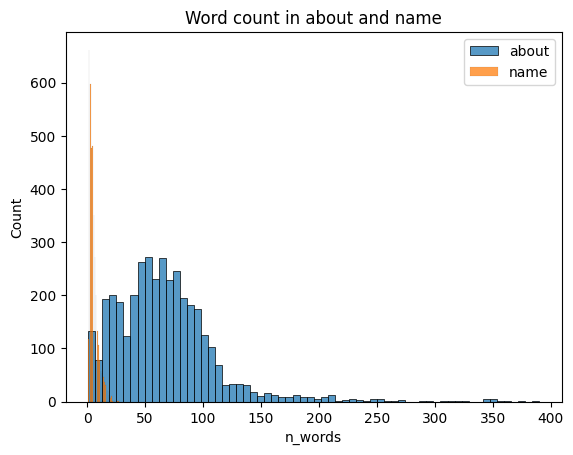

In [ ]:
sns.histplot(len_df, x='len_about_segmented', label='about')
sns.histplot(len_df, x='len_name_segmented', label='name')
plt.title('Word count in about and name')
plt.xlabel('n_words')
plt.legend()

- Tất cả văn bản đều < 512 token --> có thể dùng BERT để tokenize mà không cần truncate
- About:
    - độ dài văn bản trong about có phân phối chuẩn, phần lớn có độ dài khoản 50 - 75 token
    - min = 1, max = 390
- Name:
    - độ dài văn bản trong name có dạng long tail
    - min = 1, max = 28

- Bên cạnh đó, ta thấy được vẫn còn một số ký tự tiếng Trung chưa được dịch và một số ký tự đặc biệt như ✍

Tiếp đến, ta sẽ thông kê trường field. Nhưng do trường này bị trùng lặp với một file khác trong relation là course-field.json nên ta sẽ load file này lên để kiểm tra.

In [10]:
course_field_df = pl.read_ndjson(os.path.join(TRANS_DIR, 'relations/course-field.json'))
course_field_df.head()

course_id,course_name,field,course_name_trans
i64,str,list[str],str
584313,"""《资治通鉴》导读""","[""trường dạy tiếng trung"", ""lịch sử""]","""giới thiệu về …"
681932,"""“做中学”Java程序设计""","[""khoa học và công nghệ máy tính""]","""lập trình java…"
674962,"""《红楼梦》的空间艺术""","[""trường dạy tiếng trung""]","""nghệ thuật khô…"
682709,"""《纯粹理性批判》导论""","[""triết lý""]","""giới thiệu về …"
682635,"""《统万城》导读""","[""lịch sử""]","""giới thiệu về …"


In [11]:
course_field_df.shape

(632, 4)

Trong course_field_df chỉ có 632 khóa học (course_df có 3781 khóa), nghĩa là chỉ có 632 khóa học có lĩnh vực (chưa tính rỗng). Điều này có thể do dữ liệu crawl bị thiết hoặc đơn giản là người tạo khóa học không gắn tag cho khóa học của mình. Nhưng nhìn chung, ta vẫn có thể dùng đặc trưng này bổ sung với những thông tin khác để gợi ý khóa học. Để kết hợp các field lại, một cách đơn giản là ta sẽ sử dụng phép hợp.

In [12]:
course_field_df = course_field_df.with_columns(pl.col('course_id').map_elements(lambda x: f'C_{x}'))

In [13]:
course_field_df.head()

course_id,course_name,field,course_name_trans
str,str,list[str],str
"""C_584313""","""《资治通鉴》导读""","[""trường dạy tiếng trung"", ""lịch sử""]","""giới thiệu về …"
"""C_681932""","""“做中学”Java程序设计""","[""khoa học và công nghệ máy tính""]","""lập trình java…"
"""C_674962""","""《红楼梦》的空间艺术""","[""trường dạy tiếng trung""]","""nghệ thuật khô…"
"""C_682709""","""《纯粹理性批判》导论""","[""triết lý""]","""giới thiệu về …"
"""C_682635""","""《统万城》导读""","[""lịch sử""]","""giới thiệu về …"


In [14]:
course_field_df.describe()

describe,course_id,course_name,field,course_name_trans
str,str,str,str,str
"""count""","""632""","""632""","""632""","""632"""
"""null_count""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null
"""std""",null,null,null,null
"""min""","""C_1749733""","""5G与人工智能""",null,"""5g và trí tuệ …"
"""25%""",null,null,null,null
"""50%""",null,null,null,null
"""75%""",null,null,null,null
"""max""","""C_901947""","""麦肯锡“全球领导力”""",null,"""ứng dụng kỹ th…"


Dùng set để kiểm tra xem trong 632 khóa học có tồn tại khóa học không thuộc 3871 khóa học hay không

In [ ]:
courses_1 = set(course_df['id'])
courses_2 = set(course_field_df['course_id'])

print(f'Intersection: {len(courses_1.intersection(courses_2))}')
print(f'In 632, not in 3871: {len(courses_2.difference(courses_1))}')

Intersection: 547
In 631, not in 3871: 85


Như vậy, gồm 85 khóa học không tồn tại. Tiếp đến, ta kết hợp 2 trường field lại với nhau

In [ ]:
der_cf_df = course_field_df.select(['course_id', 'field']) \
                            .rename({'course_id': 'id'}) \
                            .explode('field')

ori_cf_df = course_df.select(['id', 'field']).explode('field')

print(der_cf_df.shape, ori_cf_df.shape)

join_cf_df = pl.concat([ori_cf_df, der_cf_df]).drop_nulls() \
                .unique() \
                .groupby(['id']) \
                .agg(pl.col('field')) \
                .sort('id')
join_cf_df

(794, 2) (3917, 2)


<ipython-input-42-a892546cd9d6>:11: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['id']) \


id,field
str,list[str]
"""C_1749733""","[""khoa học và công nghệ máy tính"", ""toán học""]"
"""C_1766899""","[""vật lý""]"
"""C_1814513""","[""kinh tế học ứng dụng""]"
"""C_584313""","[""lịch sử"", ""trường dạy tiếng trung""]"
"""C_584329""","[""toán học"", ""kinh tế học ứng dụng"", … ""kinh tế lý thuyết""]"
"""C_584381""","[""báo chí"", ""nghệ thuật""]"
"""C_597159""","[""khoa học và công nghệ máy tính""]"
"""C_597208""","[""khoa học và công nghệ máy tính""]"
"""C_597211""","[""khoa học và công nghệ máy tính""]"


In [ ]:
course_df = course_df.join(join_cf_df, on='id', how='left') \
                        .drop('field').rename({'field_right': 'field'})

course_df

id,name,prerequisites,about,resource,name_trans,about_trans,about_segmented,name_segmented,field
str,str,str,str,list[struct[3]],str,str,str,str,list[str]
"""C_584313""","""《资治通鉴》导读""","""""","""通过老师导读，同学们可深入这…","[{[""第一课 导论与三家分晋"", ""导论"", ""导论""],""V_849"",""1.1.1""}, {[""第一课 导论与三家分晋"", ""智伯的覆亡"", ""智伯的覆亡""],""V_850"",""1.2.1""}, … {[""第十五课 隋唐霸业"", null, ""第十五课 隋唐霸业--习题""],""Ex_957"",""15.8""}]","""giới thiệu về …","""thông qua sự h…","""thông_qua sự h…","""giới_thiệu về …","[""lịch sử"", ""trường dạy tiếng trung""]"
"""C_584329""","""微积分——极限理论与一元函数…","""""","""本课程是理工科的一门数学基础…","[{[""序言"", ""序言"", ""序言""],""V_1350"",""1.1.1""}, {[""第一章 实数与函数"", ""第一节 实数集的界与确界"", ""实数集的界""],""V_1351"",""2.1.1""}, … {[""第八章 级数"", null, ""第八章 级数--第六节思考与练习""],""Ex_1545"",""9.9""}]","""giải tích - lý…","""khóa học này l…","""khoá học này l…","""giải_tích - lý…","[""toán học"", ""kinh tế học ứng dụng"", … ""kinh tế lý thuyết""]"
"""C_584381""","""新闻摄影""","""""","""掌握基本的摄影技能，了解图片…","[{[""第一章 绪论"", ""第一讲 引言1"", ""引言1""],""V_1800"",""1.1.1""}, {[""第一章 绪论"", ""第二讲 引言2"", ""引言2""],""V_1801"",""1.2.1""}, … {[""大作业提交"", null, ""《大作业》提交--小节""],""Ex_1926"",""20.4""}]","""chụp ảnh tin t…","""nắm vững các k…","""nắm vững các k…","""chụp ảnh tin_t…","[""báo chí"", ""nghệ thuật""]"
"""C_597208""","""数据挖掘：理论与算法""","""""","""最有趣的理论+最有用的算法=…","[{[""走进数据科学：博大精深，美不胜收"", ""整装待发"", ""Video""],""V_2961"",""1.1.1""}, {[""走进数据科学：博大精深，美不胜收"", ""学而不思则罔"", ""Video""],""V_2962"",""1.3.1""}, … {[""美丽数据说：阆苑仙葩，美玉无瑕"", null, ""第十一章第一节测试题""],""Ex_3104"",""11.1""}]","""khai thác dữ l…","""lý thuyết thú …","""lý_thuyết thú_…","""khai_thác dữ_l…","[""khoa học và công nghệ máy tính""]"
"""C_597225""","""大学计算机""","""""","""大学计算机课程将以计算思维为…","[{[""第1周： 基于计算机的问题求解"", ""课程介绍"", ""开篇""],""V_4596"",""1.1.1""}, {[""第1周： 基于计算机的问题求解"", ""1.0 本章导学"", ""1.0 本章导学""],""V_4597"",""1.2.1""}, … {[""第9周：算法与程序设计"", null, ""第九周测验""],""Ex_4827"",""10.12""}]","""máy tính đại h…","""các khóa học m…","""các khoá học m…","""máy_tính đại_h…",null
"""C_597229""","""财务分析与决策""","""""","""这门课程用财务语言解构企业的…","[{[""资金的运用——认识资产"", ""1.1 绪论"", ""绪论""],""V_5042"",""2.1.1""}, {[""资金的运用——认识资产"", ""1.2 认识资产负债表"", ""认识资产负债表""],""V_5043"",""2.2.1""}, … {[""期末大作业——主观题"", null, ""期末主观题""],""Ex_5144"",""12.2""}]","""phân tích tài …","""khóa học này s…","""khoá học này s…","""phân_tích tài_…","[""kinh tế học ứng dụng"", ""khoa học và kỹ thuật quản lý""]"
"""C_597291""","""高级英语写作""","""""","""本课程能够帮助学生掌握英语段…","[{[""Chapter One Paragraph Writing"", ""1.1 Parts of a Paragraph"", ""1.1 Parts of a Paragraph""],""V_8379"",""1.1.1""}, {[""Chapter One Paragraph Writing"", ""1.2 Four Steps in Writing"", ""1.2.1 Step 1- Begin with a point""],""V_8380"",""1.2.1""}, … {[""Chapter Five Research Paper Writing"", null, ""Chapter Five Research Paper Writing""],""Ex_8432"",""5.3""}]","""viết tiếng anh…","""khóa học này c…","""khoá học này c…","""viết tiếng anh…",null
"""C_597307""","""大唐兴衰""","""""","""隋唐五代史是史学名著《资治通…","[{[""第一课、隋朝开基"", ""第一节 隋帝杨坚"", ""第一节 隋帝杨坚""],""V_9394"",""1.1.1""}, {[""第一课、隋朝开基"", ""第二节 杨隋代周"", ""第二节 杨隋代周""],""V_9395"",""1.2.1""}, … {[""第十二课、落日长安"", null, ""第十二课、落日长安--习题""],""Ex_9464"",""12.5""}]","""sự thăng trầm …","""lịch sử nhà tù…","""lịch_sử nhà tu…","""sự thăng_trầm …","[""lịch sử""]"
"""C_597365""","""五分钟轻松搞定职场礼仪（20…","""""","""职场“礼”为先，成功的未来不…","[{[""课程介绍动画：职场“礼”为先，成功的未来不是梦"", ""课程介绍动画"", ""课程介绍动画 — 职场“礼”为先，成功的未来不是梦""],""V_15713"",""1.1.1""}, {[""第一章 塑造优雅、大方、可亲的职业形象"", ""第一节 坐姿篇"", ""本讲导学 坐姿""],""V_15714"",""2.1.1""}, … {[""第五章 应对繁杂、多变、细致的文化差异"", ""第四节 欧美篇"", ""授课视频 讲义 — 欧美各国礼仪""],""V_15800"",""6.4.1""}]","""dễ dàng nắm vữ…","""“nghi thức” đư…","""“ nghi_thức ” …","""dễ_dàng nắm vữ…",null


Số lượng fields của các khóa học

In [ ]:
len_df = course_df.select(['id', 'field']).with_columns(
    pl.col('field').list.len().alias('len')
).drop('field')

len_df.head()

id,len
str,u32
"""C_584313""",2
"""C_584329""",4
"""C_584381""",2
"""C_597208""",1
"""C_597225""",0


Text(0.5, 0, '# of fields')

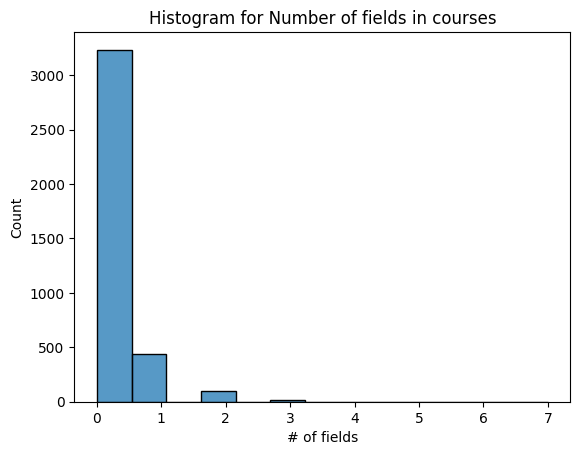

In [ ]:
sns.histplot(len_df, x='len')
plt.title('Histogram for Number of fields in courses')
plt.xlabel('# of fields')

In [ ]:
len_df.describe()

describe,id,len
str,str,f64
"""count""","""3781""",3781.0
"""null_count""","""0""",0.0
"""mean""",null,0.18064
"""std""",null,0.490552
"""min""","""C_1017355""",0.0
"""25%""",null,0.0
"""50%""",null,0.0
"""75%""",null,0.0
"""max""","""C_956450""",7.0


Số lượng khóa học của mỗi field

N fields:  81


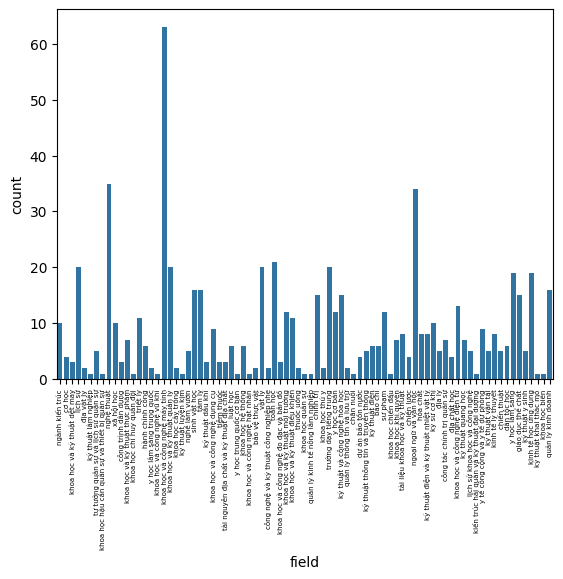

In [ ]:
uni_courses = course_df['field'].explode() \
                                .drop_nulls()\
                                .value_counts()

sns.barplot(uni_courses, x='field', y='count')
plt.xticks(rotation=90, fontsize=5)

print('N fields: ', uni_courses.shape[0])

In [ ]:
uni_courses.describe()

describe,field,count
str,str,f64
"""count""","""81""",81.0
"""null_count""","""0""",0.0
"""mean""",null,8.432099
"""std""",null,9.44317
"""min""","""báo chí""",1.0
"""25%""",null,2.0
"""50%""",null,6.0
"""75%""",null,11.0
"""max""","""địa vật lý""",63.0


In [ ]:
uni_courses.filter(pl.col('count') == uni_courses['count'].max()).to_numpy()

array([['khoa học và công nghệ máy tính', 63]], dtype=object)

In [ ]:
uni_courses.filter(pl.col('count') == uni_courses['count'].min()).to_numpy()

array([['kỹ thuật lâm nghiệp', 1],
       ['khoa học hậu cần quân sự và thiết bị quân sự', 1],
       ['khoa học chỉ huy quân đội', 1],
       ['khoa học và công nghệ vũ khí', 1],
       ['kỹ thuật luyện kim', 1],
       ['y học trung quốc cơ bản', 1],
       ['khoa học và công nghệ hạt nhân', 1],
       ['khoa học quân sự', 1],
       ['quản lý kinh tế nông lâm nghiệp', 1],
       ['chăn nuôi', 1],
       ['khoa học chiến đấu', 1],
       ['kiến trúc hải quân và kỹ thuật đại dương', 1],
       ['kỹ thuật khai thác mỏ', 1],
       ['khoa học biển', 1]], dtype=object)

In [ ]:
len(uni_courses.filter(pl.col('count') < 5))

32

Nhìn chung, số lượng khóa học có field khá ít (632 khóa), mà số lượng field có số lượng khóa học ít hơn 5 là 32 field (tổng 81 field). Khả năng cao, đặc trưng này sẽ có ít đóng góp --> không thể xem là feature chính

In [ ]:
course_df.write_ndjson(os.path.join(PRE_DIR, 'entities/course_eda.json'))

### Concept

In [16]:
concept_df = pl.read_ndjson(os.path.join(RAW_DIR, 'entities/concept.json'))
concept_df.head()

id,name,context
str,str,list[str]
"""K_神经部_组织学与胚胎学""","""神经部""",[]
"""K_促甲状腺激素细胞_组织学…","""促甲状腺激素细胞""","[""质和髓质两部分组成 答案：B 13．腺垂体嗜酸性细胞可分为 A．催乳激素细胞、促肾上腺皮质激素细胞和促甲状腺激素细胞 B．生长激素细胞、催乳激素细胞和抗利尿激素细胞 C．促肾上腺皮质激素细胞、促甲状腺激素细胞和促性腺"", ""素细胞和促甲状腺激素细胞 B．生长激素细胞、催乳激素细胞和抗利尿激素细胞 C．促肾上腺皮质激素细胞、促甲状腺激素细胞和促性腺激素细胞 D．生长激素细胞、催乳激素细胞 E．催乳激素细胞、促甲状腺激素细胞和促性腺激素细胞"", … ""质和髓质两部分组成 答案：B 13．腺垂体嗜酸性细胞可分为 A．催乳激素细胞、促肾上腺皮质激素细胞和促甲状腺激素细胞 B．生长激素细胞、催乳激素细胞和抗利尿激素细胞 C．促肾上腺皮质激素细胞、促甲状腺激素细胞和促性腺""]"
"""K_嗜色细胞_组织学与胚胎学…","""嗜色细胞""",[]
"""K_生长激素细胞_组织学与胚…","""生长激素细胞""","[""案：B 13．腺垂体嗜酸性细胞可分为 A．催乳激素细胞、促肾上腺皮质激素细胞和促甲状腺激素细胞 B．生长激素细胞、催乳激素细胞和抗利尿激素细胞 C．促肾上腺皮质激素细胞、促甲状腺激素细胞和促性腺激素细胞 D．生长"", ""细胞、催乳激素细胞和抗利尿激素细胞 C．促肾上腺皮质激素细胞、促甲状腺激素细胞和促性腺激素细胞 D．生长激素细胞、催乳激素细胞 E．催乳激素细胞、促甲状腺激素细胞和促性腺激素细胞 答案：D 14．腺垂体嗜碱性细胞"", … ""细胞、催乳激素细胞和抗利尿激素细胞 C．促肾上腺皮质激素细胞、促甲状腺激素细胞和促性腺激素细胞 D．生长激素细胞、催乳激素细胞 E．催乳激素细胞、促甲状腺激素细胞和促性腺激素细胞 答案：D 14．腺垂体嗜碱性细胞""]"
"""K_褐铁矿_材料科学与工程""","""褐铁矿""","["" 褐铁矿（Limonite）是一种常见的铁矿，常形成于铁矿床的氧化带中，多以次生矿形态存在。也经常因沉积作用"", ""相当重要的铁矿资源之一。 中药“禹余粮”(别称：余粮石、白禹余、太一禹余粮、石脑）即此矿物。 沉积形褐铁矿。"", … ""，而另一种是镍纹石。[来源请求] 大部分采矿得来的镍都来自两种矿床。第一种是砖红壤，主要矿物为含镍的褐铁矿：(Fe, Ni)O(OH)与硅镁镍矿（一种含镍的硅酸盐）：(Ni, Mg)3Si2O5(OH)4。""]"


In [17]:
concept_df.describe()

describe,id,name,context
str,str,str,str
"""count""","""637572""","""637572""","""637572"""
"""null_count""","""0""","""0""","""0"""
"""mean""",null,null,null
"""std""",null,null,null
"""min""","""K_ T细胞_感染病学""",""" T细胞""",null
"""25%""",null,null,null
"""50%""",null,null,null
"""75%""",null,null,null
"""max""","""K_ｇ分布的概率分布函数_数…","""ｇ分布的概率分布函数""",null


Nhận xét chung:
- trường name không có quá nhiều ý nghĩa để sử dụng tfidf.
- trường context cho biết vị trí xuất hiện của của concept trong các bài tập

Tóm lại, ta sẽ chỉ coi concept trong mối quan hệ với khóa học tương tự như trường field, nghĩa là mỗi course sẽ có những concept nào. Tiếp đến ta sẽ xem xét course-field file. Do việc sử dụng bảng concept không có quá nhiều ý nghĩa, nên có thể không cần quan tâm đến việc concept có tồn tại trong course-field file hay không.

In [ ]:
valid_courses = course_df['id']

In [ ]:
concept_course_df = pl.read_csv(os.path.join(RAW_DIR, 'relations/concept-course.txt'),
                                separator='\t', has_header=False,
                                new_columns=['concept', 'course']) \
                        .filter(pl.col('course').is_in(valid_courses)) \
                        .unique()
concept_course_df

concept,course
str,str
"""K_相电源_控制科学与工程""","""C_681460"""
"""K_控制线缆_控制科学与工程…","""C_681460"""
"""K_pid指令_控制科学与工…","""C_681460"""
"""K_控制自动化_控制科学与工…","""C_681460"""
"""K_转换负值_控制科学与工程…","""C_681460"""
"""K_内部继电器_控制科学与工…","""C_681460"""
"""K_并行分支_控制科学与工程…","""C_681460"""
"""K_管网水压_控制科学与工程…","""C_681460"""
"""K_设备接线_控制科学与工程…","""C_681460"""


Số lượng concept của các course

In [ ]:
count_df = concept_course_df.group_by('course').count()
count_df

course,count
str,u32
"""C_1764851""",474
"""C_746968""",248
"""C_677218""",1312
"""C_682308""",528
"""C_681684""",908
"""C_682152""",234
"""C_799783""",1
"""C_1774980""",252
"""C_1765596""",14


Text(0.5, 1.0, 'Histogram for number of concepts in courses')

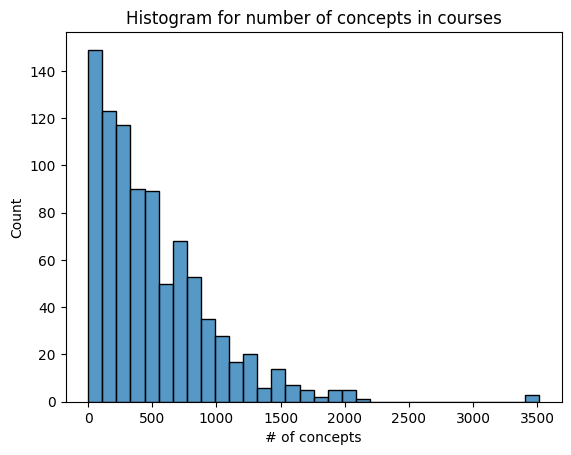

In [ ]:
sns.histplot(count_df, x='count')
plt.xlabel('# of concepts')
plt.title('Histogram for number of concepts in courses')

In [ ]:
count_df.describe()

describe,course,count
str,str,f64
"""count""","""887""",887.0
"""null_count""","""0""",0.0
"""mean""",null,508.543405
"""std""",null,454.52013
"""min""","""C_1169394""",1.0
"""25%""",null,186.0
"""50%""",null,402.0
"""75%""",null,727.0
"""max""","""C_947773""",3515.0


- Số lượng concept trong course có dạng long tail
- Số lượng concept nhiều nhất là 3515, ít nhất là 0

In [ ]:
cf_set = set(join_cf_df['id'])
cc_set = set(count_df['course'])
print(len(cf_set.difference(cc_set)))
print(len(cc_set.difference(cf_set)))
print(len(cc_set.union(cf_set)))

89
344
976


Có 976 course có thông tin về field hoặc concept, ít course có side information

Số lượng khóa học của concept

In [ ]:
count_df = concept_course_df.group_by('concept').count()
count_df

concept,count
str,u32
"""K_原油加工能力_中国语言文…",1
"""K_跨部门协作_公共管理""",1
"""K_中枢免疫系统_临床医学""",1
"""K_地表局地温度_大气科学""",3
"""K_凹坑深度_动力工程及工程…",1
"""K_决策有用的信息_应用经济…",1
"""K_起偏器_物理学""",3
"""K_磁头数_计算机科学与技术…",1
"""K_排气门_机械工程""",1


Text(0.5, 0, '# of courses')

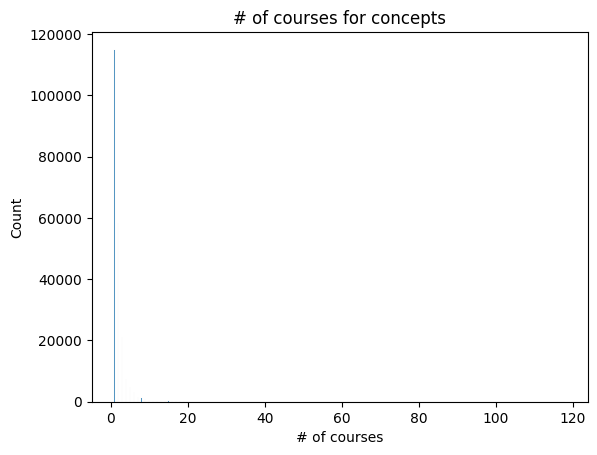

In [ ]:
sns.histplot(count_df, x='count')
plt.title('# of courses for concepts')
plt.xlabel('# of courses')

In [ ]:
count_df.describe()

describe,concept,count
str,str,f64
"""count""","""216096""",216096.0
"""null_count""","""0""",0.0
"""mean""",null,2.087396
"""std""",null,3.166521
"""min""","""K_$ _计算机科学与技术""",1.0
"""25%""",null,1.0
"""50%""",null,1.0
"""75%""",null,2.0
"""max""","""K_ｇ分布的概率分布函数_数…",118.0


In [ ]:
len(count_df.filter(pl.col('count') >= 5)), len(count_df.filter(pl.col('count') >= 10))

(14016, 2887)

In [ ]:
concept_course_df.write_csv(os.path.join(PRE_DIR, 'relations/concept-course_eda.txt'),
                            include_header=False, separator='\t')

### School

In [ ]:
course_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/course_eda.json'))
course_df.head()

id,name,prerequisites,about,resource,name_trans,about_trans,about_segmented,name_segmented,field
str,str,str,str,list[struct[3]],str,str,str,str,str
"""C_584313""","""《资治通鉴》导读""","""""","""通过老师导读，同学们可深入这…","[{[""第一课 导论与三家分晋"", ""导论"", ""导论""],""V_849"",""1.1.1""}, {[""第一课 导论与三家分晋"", ""智伯的覆亡"", ""智伯的覆亡""],""V_850"",""1.2.1""}, … {[""第十五课 隋唐霸业"", null, ""第十五课 隋唐霸业--习题""],""Ex_957"",""15.8""}]","""giới thiệu về …","""thông qua sự h…","""thông_qua sự h…","""giới_thiệu về …",null
"""C_584329""","""微积分——极限理论与一元函数…","""""","""本课程是理工科的一门数学基础…","[{[""序言"", ""序言"", ""序言""],""V_1350"",""1.1.1""}, {[""第一章 实数与函数"", ""第一节 实数集的界与确界"", ""实数集的界""],""V_1351"",""2.1.1""}, … {[""第八章 级数"", null, ""第八章 级数--第六节思考与练习""],""Ex_1545"",""9.9""}]","""giải tích - lý…","""khóa học này l…","""khoá học này l…","""giải_tích - lý…",null
"""C_584381""","""新闻摄影""","""""","""掌握基本的摄影技能，了解图片…","[{[""第一章 绪论"", ""第一讲 引言1"", ""引言1""],""V_1800"",""1.1.1""}, {[""第一章 绪论"", ""第二讲 引言2"", ""引言2""],""V_1801"",""1.2.1""}, … {[""大作业提交"", null, ""《大作业》提交--小节""],""Ex_1926"",""20.4""}]","""chụp ảnh tin t…","""nắm vững các k…","""nắm vững các k…","""chụp ảnh tin_t…",null
"""C_597208""","""数据挖掘：理论与算法""","""""","""最有趣的理论+最有用的算法=…","[{[""走进数据科学：博大精深，美不胜收"", ""整装待发"", ""Video""],""V_2961"",""1.1.1""}, {[""走进数据科学：博大精深，美不胜收"", ""学而不思则罔"", ""Video""],""V_2962"",""1.3.1""}, … {[""美丽数据说：阆苑仙葩，美玉无瑕"", null, ""第十一章第一节测试题""],""Ex_3104"",""11.1""}]","""khai thác dữ l…","""lý thuyết thú …","""lý_thuyết thú_…","""khai_thác dữ_l…",null
"""C_597225""","""大学计算机""","""""","""大学计算机课程将以计算思维为…","[{[""第1周： 基于计算机的问题求解"", ""课程介绍"", ""开篇""],""V_4596"",""1.1.1""}, {[""第1周： 基于计算机的问题求解"", ""1.0 本章导学"", ""1.0 本章导学""],""V_4597"",""1.2.1""}, … {[""第9周：算法与程序设计"", null, ""第九周测验""],""Ex_4827"",""10.12""}]","""máy tính đại h…","""các khóa học m…","""các khoá học m…","""máy_tính đại_h…",null


In [8]:
school_df = pl.read_ndjson(os.path.join(TRANS_DIR, 'entities/school.json'))
school_df

id,name,name_en,sign,about,motto,about_trans,motto_trans
str,str,str,str,str,str,str,str
"""S_1""","""清华大学""","""Tsinghua Unive…","""thu""","""简称“清华”，由中华人民共和…","""自强不息,厚德载物""","""“thanh hoa” gọ…","""tự hoàn thiện …"
"""S_2""","""北京大学""","""Peking Univers…","""PKU""","""北京大学（Peking Un…","""博学、审问、慎思、明辨""","""đại học bắc ki…","""sự uyên bác, s…"
"""S_3""","""武汉大学""","""Wuhan Universi…","""whu""","""武汉大学（Wuhan Uni…","""自强 弘毅 求是 拓新""","""đại học vũ hán…","""hoàn thiện bản…"
"""S_4""","""苏州大学""","""Soochow Univer…","""suda""","""苏州大学（Soochow U…","""养天地正气，法古今完人""","""đại học soocho…","""nuôi dưỡng lẽ …"
"""S_5""","""四川大学""","""Sichuan Univer…","""scu""","""四川大学（Sichuan U…","""""","""đại học tứ xuy…",""""""
"""S_6""","""北京理工大学""","""Beijing Instit…","""bit""","""北京理工大学（Beijing…","""""","""viện công nghệ…",""""""
"""S_7""","""北京师范大学""","""Beijing Normal…","""bnu""","""北京师范大学（Beijing…","""学为人师、行为世范""","""đại học sư phạ…","""học làm giáo v…"
"""S_8""","""台湾交通大学""","""National Chiao…","""nctu""","""台湾交通大学（Nationa…","""""","""đại học quốc g…",""""""
"""S_9""","""暨南大学""","""Jinan Universi…","""jnu""","""暨南大学是中国第一所由政府创…","""忠信笃敬""","""đại học tế nam…","""lòng trung thà…"


In [9]:
school_df.describe()

describe,id,name,name_en,sign,about,motto,about_trans,motto_trans
str,str,str,str,str,str,str,str,str
"""count""","""429""","""429""","""429""","""429""","""429""","""429""","""429""","""429"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null
"""min""","""S_1""","""Microsoft""","""Air Force Engi…","""AFEU""","""2018 年11 月1 日，…","""""","""cao đẳng binzh…",""""""
"""25%""",null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null
"""max""","""S_99""","""齐鲁工业大学""","""zjxb""","""zzut""","""齐鲁工业大学（山东省科学院）…","""重德重能，求实求新""","""“thanh hoa” gọ…","""ở đây anh ấy đ…"


Nhận xét chung:
- Trường name, name_en, motto không có quá nhiều ý nghĩa khi sử dụng tfdf để trích xuất feature
- Trường about_trans (about) mô tả về school. Liệu có thể sử dụng trường này để trích xuất feature cho course? Để đơn giản, nhóm sẽ tạo feature multilabel school, nghĩa là feature này sẽ là một binary vector, nếu course thuộc school này thì bật bit 1 tại vị trí tương ứng, ngược lại là 0. Như vậy, việc này chỉ phụ thuộc vào liên kết giữa course và school, nên việc school không tồn tại trong school.json nhưng tồn tại trong course_school.txt thì vẫn chấp nhận được.

In [ ]:
valid_courses = course_df['id'].unique()
course_school_df = pl.read_csv(os.path.join(RAW_DIR, 'relations/course-school.txt'),
                               separator='\t', has_header=False, new_columns=['course', 'school']) \
                        .filter(pl.col('course').is_in(valid_courses))
course_school_df

course,school
str,str
"""C_584313""","""S_1"""
"""C_584329""","""S_1"""
"""C_584381""","""S_1"""
"""C_597208""","""S_1"""
"""C_597225""","""S_6"""
"""C_597229""","""S_1"""
"""C_597291""","""S_12"""
"""C_597307""","""S_1"""
"""C_597314""","""S_1"""


Thống kê số course của mỗi trường

In [ ]:
count_df = course_school_df.group_by(pl.col('school')).count()
count_df

school,count
str,u32
"""S_611""",2
"""S_502""",3
"""S_296""",14
"""S_971""",2
"""S_199""",1
"""S_156""",1
"""S_1206""",1
"""S_305""",3
"""S_35""",37


Text(0.5, 0, '# of courses')

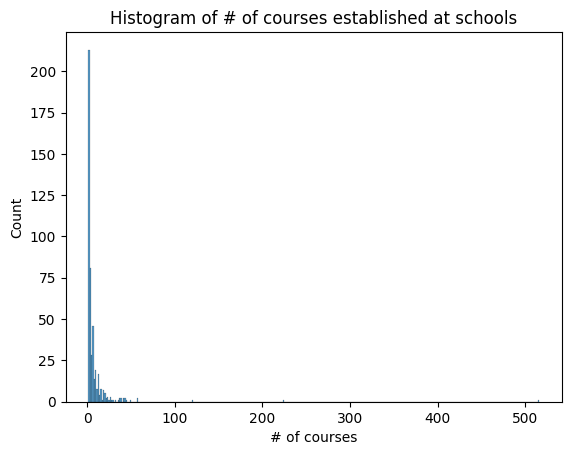

In [ ]:
sns.histplot(count_df, x='count')
plt.title('Histogram of # of courses established at schools')
plt.xlabel('# of courses')

In [ ]:
count_df.describe()

describe,school,count
str,str,f64
"""count""","""479""",479.0
"""null_count""","""0""",0.0
"""mean""",null,7.824635
"""std""",null,27.140548
"""min""","""S_1""",1.0
"""25%""",null,1.0
"""50%""",null,3.0
"""75%""",null,7.0
"""max""","""S_99""",516.0


In [ ]:
len(count_df.filter(pl.col('count') >= 5)), len(count_df.filter(pl.col('count') >= 10))

(185, 87)

- Số lượng course của một school có dạng long tail
- Phần lớn school sẽ có từ 7 course trở xuống (75%)
- Vẫn có một số school đặc biệt tổ chức từ 100 course trở lên
- Min: 1, max: 516
- Có 185 school tổ chức ít nhất 5 course; có 87 school tổ chức ít nhất 10 course. Để đảm bảo chất lượng cho tập train của một số phương pháp, việc lọc bỏ bớt các school có ít hơn thresh course (thresh thường = 5, 10) sẽ được thực hiện, điều này khiến số lượng school giảm nhiều

Thống kê số school cùng tổ chức 1 course

In [ ]:
count_df = course_school_df.group_by('course').count()
count_df

course,count
str,u32
"""C_676635""",1
"""C_681688""",1
"""C_1776296""",1
"""C_758194""",1
"""C_2172675""",1
"""C_674950""",1
"""C_1907853""",1
"""C_948136""",1
"""C_2341305""",1


In [ ]:
count_df.describe()

describe,course,count
str,str,f64
"""count""","""3717""",3717.0
"""null_count""","""0""",0.0
"""mean""",null,1.00834
"""std""",null,0.090955
"""min""","""C_1017355""",1.0
"""25%""",null,1.0
"""50%""",null,1.0
"""75%""",null,1.0
"""max""","""C_956450""",2.0


In [ ]:
sc_set = set(count_df['course'])
print('Union of course-school, course-concept, course-field: ', len(sc_set.union(cc_set).union(cf_set)))

Union of course-school, course-concept, course-field:  3803


- Phần lớn course chỉ thuộc 1 school. Điều này là khác biệt so với field, concept trước đó, tuy nhiên việc này không ảnh hưởng nhiều.
- min: 1, max: 2

In [ ]:
course_school_df.write_csv(os.path.join(PRE_DIR, 'relations/course-school_eda.txt'),
                           include_header=False, separator='\t')

### Teacher

In [18]:
teacher_df = pl.read_ndjson(os.path.join(TRANS_DIR, 'entities/teacher.json'))
teacher_df

id,name,name_en,about,job_title,org_name,about_trans
str,str,str,str,str,str,str
"""T_1""","""刘燕妮""","""Yanni Liu""","""北大哲学系毕业，清华大学马克…","""giảng viên""","""đại học thanh …","""tốt nghiệp kho…"
"""T_2""","""陈怡""","""Yi Chen""","""1945年生于重庆，1967…","""giáo sư""","""đại học thanh …","""sinh năm 1945 …"
"""T_3""","""程钢""","""Gang Cheng""","""程钢，《庄子哲学导读》课程负…","""phó giáo sư""","""đại học thanh …","""cheng gang là …"
"""T_4""","""谢维和""",null,"""谢维和，博士、教授、博士生导…","""giáo sư""","""đại học thanh …","""xie weihe, tiế…"
"""T_5""","""史静寰""","""Jing-huan Shi""","""史静寰，女，清华大学教育研究…","""giáo sư""","""đại học thanh …","""shi jinghuan, …"
"""T_6""","""王孙禺""",null,"""王孙禺，汉族，教授、博士生导…","""giáo sư""","""đại học thanh …","""wang sunyu, qu…"
"""T_7""","""袁本涛""",null,"""袁本涛，博士、教授、博士生导…","""giáo sư""","""đại học thanh …","""yuan bentao, t…"
"""T_8""","""林健""",null,"""林健，福建福州人，英国Lan…","""giáo sư""","""đại học thanh …","""lin jian, ngườ…"
"""T_9""","""程建钢""",null,"""程建钢，博士、教授、博士生导…","""giáo sư""","""đại học thanh …","""cheng jiangang…"


In [19]:
teacher_df = teacher_df.with_columns(
    pl.when(pl.col('job_title').str.strip().str.lengths() != 0).then(pl.col('job_title').str.strip()),
    pl.when(pl.col('org_name').str.strip().str.lengths() != 0).then(pl.col('org_name').str.strip()),
    pl.when(pl.col('about_trans').str.strip().str.lengths() != 0).then(pl.col('about_trans').str.strip())
)

<ipython-input-19-6e8756e19eda>:2: DeprecationWarning: `strip` is deprecated. It has been renamed to `strip_chars`.
  pl.when(pl.col('job_title').str.strip().str.lengths() != 0).then(pl.col('job_title').str.strip()),
<ipython-input-19-6e8756e19eda>:2: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  pl.when(pl.col('job_title').str.strip().str.lengths() != 0).then(pl.col('job_title').str.strip()),
<ipython-input-19-6e8756e19eda>:3: DeprecationWarning: `strip` is deprecated. It has been renamed to `strip_chars`.
  pl.when(pl.col('org_name').str.strip().str.lengths() != 0).then(pl.col('org_name').str.strip()),
<ipython-input-19-6e8756e19eda>:3: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  pl.when(pl.col('org_name').str.strip().str.lengths() != 0).then(pl.col('org_name').str.strip()),
<ipython-input-19-6e8756e19eda>:4: DeprecationWarning: `strip` is deprecated. It has been renamed to `strip_chars`.
  pl.when(pl.col('ab

In [20]:
teacher_df.describe()

describe,id,name,name_en,about,job_title,org_name,about_trans
str,str,str,str,str,str,str,str
"""count""","""17018""","""17018""","""9525""","""17018""","""14768""","""17018""","""13892"""
"""null_count""","""0""","""0""","""7493""","""0""","""2250""","""0""","""3126"""
"""mean""",null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null
"""min""","""T_1""",""" 伊萨克·布赫曼""","""""","""""","""--""","""""trang trí""""","""""gia nhập tenc…"
"""25%""",null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null
"""max""","""T_9999""","""﻿﻿刘耕源""","""防灾科技学院""","""，教授/博导，泰山学者青年专…","""ứng viên tiến …","""ủy ban điều ti…","""thành tựu học…"


In [ ]:
teacher_df.describe()

describe,id,name,name_en,about,job_title,org_name,about_trans
str,str,str,str,str,str,str,str
"""count""","""17018""","""17018""","""9525""","""17018""","""14768""","""17018""","""13892"""
"""null_count""","""0""","""0""","""7493""","""0""","""2250""","""0""","""3126"""
"""mean""",null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null
"""min""","""T_1""",""" 伊萨克·布赫曼""","""""","""""","""--""","""""trang trí""""","""""gia nhập tenc…"
"""25%""",null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null
"""max""","""T_9999""","""﻿﻿刘耕源""","""防灾科技学院""","""，教授/博导，泰山学者青年专…","""ứng viên tiến …","""ủy ban điều ti…","""thành tựu học…"


Nhận xét chung:
- Trường name, name_en không có nhiều ý nghĩa
- Trường about_trans (about) nói về tên, background kiến thức của teacher. Để đơn giản, ta sẽ tạm không quan tâm đến trường này.
- job_title: chức danh của teacher, có thể có ích trong việc thiết kế feature. Có khá 2250 job_title (tổng 14768) là null.Thật chất, job_title nên đc xem như là văn bản thay vì categorical, bởi vì jobtitle không chỉ đơn giản là học vị tiến sĩ, thạc sĩ, mà nó còn có thể bao gồm nhiều yếu tố như tên công ty, phòng khoa, nhiều chức danh (PGS, TS). VD:
    - "giáo sư, trường kinh tế và quản lý, đại học thanh hoa"
    
    - "phó bí thư, phó tổng bí thư đảng ủy viện kế toán công chứng trung quốc"
- Một cách sử dụng khác của job_title là sẽ dùng mô hình ngôn ngữ để trích xuất những chức danh ra mà không quan tâm đến công ty.
- org_name: tổ chức của teacher, một course có thể được tổ chức bởi một school này, nhưng school này cx có thể mời một số teacher từ tổ chức khác đến. Và việc teacher thuộc tổ chức nào ít nhiều cũng sẽ ảnh hưởng đến số lượng đăng ký khóa học.

Lọc bỏ các liên kết trong course-teacher không chứa course hoặc teacher hợp lệ; lọc bỏ các teacher không tham gia course nào

In [ ]:
course_teacher_df = pl.read_csv(os.path.join(RAW_DIR, 'relations/course-teacher.txt'),
                                separator='\t', has_header=False, new_columns=['course', 'teacher'])
course_teacher_df

course,teacher
str,str
"""C_323899""","""T_5092"""
"""C_323899""","""T_5092"""
"""C_324384""","""T_6164"""
"""C_324384""","""T_6472"""
"""C_324384""","""T_6471"""
"""C_324384""","""T_6473"""
"""C_324384""","""T_6164"""
"""C_324384""","""T_6472"""
"""C_324384""","""T_6471"""


In [ ]:
valid_courses = set(course_df['id'])
valid_teachers = set(teacher_df['id']).intersection(set(course_teacher_df['teacher']))

fil_course_teacher_df = course_teacher_df.filter(
    pl.col('teacher').is_in(valid_teachers) &
    pl.col('course').is_in(valid_courses)
)

valid_teachers = set(fil_course_teacher_df['teacher'])

fil_teacher_df = teacher_df.filter(
    pl.col('id').is_in(valid_teachers)
)

fil_course_teacher_df.shape, fil_teacher_df.shape

((35593, 2), (9876, 7))

Số lượng course của mỗi teacher

In [ ]:
count_df = fil_course_teacher_df.group_by('teacher').count()
count_df

teacher,count
str,u32
"""T_1865""",6
"""T_9994""",3
"""T_445""",6
"""T_3102""",10
"""T_4826""",3
"""T_6238""",3
"""T_3109""",5
"""T_7207""",4
"""T_4115""",1


In [ ]:
count_df.describe()

describe,teacher,count
str,str,f64
"""count""","""9876""",9876.0
"""null_count""","""0""",0.0
"""mean""",null,3.603989
"""std""",null,2.32277
"""min""","""T_1""",1.0
"""25%""",null,2.0
"""50%""",null,4.0
"""75%""",null,4.0
"""max""","""T_9999""",46.0


Text(0.5, 0, '# of courses')

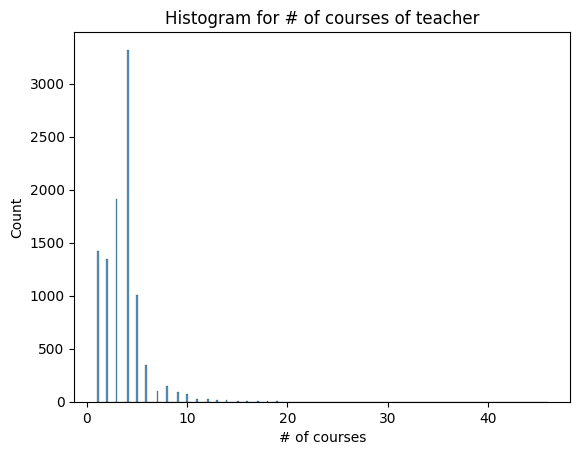

In [ ]:
sns.histplot(count_df, x='count')
plt.title('Histogram for # of courses of teacher')
plt.xlabel('# of courses')

In [ ]:
len(count_df.filter(pl.col('count') >= 5)), len(count_df.filter(pl.col('count') >= 10))

(1883, 197)

- Phần lớn teacher có số lượng courses <= 4 (75%)
- Chỉ có 1883 teacher có số course >= 5; có 197 teacher có số course >= 10

Số lượng teacher của mỗi khóa học

In [ ]:
count_df = fil_course_teacher_df.group_by('course').count()
count_df

course,count
str,u32
"""C_948102""",33
"""C_1776319""",18
"""C_696918""",5
"""C_1875503""",15
"""C_680807""",16
"""C_682491""",24
"""C_697161""",20
"""C_682273""",4
"""C_939352""",3


In [ ]:
count_df.describe()

describe,course,count
str,str,f64
"""count""","""3673""",3673.0
"""null_count""","""0""",0.0
"""mean""",null,9.690444
"""std""",null,11.383169
"""min""","""C_1017355""",1.0
"""25%""",null,3.0
"""50%""",null,5.0
"""75%""",null,12.0
"""max""","""C_956450""",216.0


Text(0.5, 0, '# of teachers')

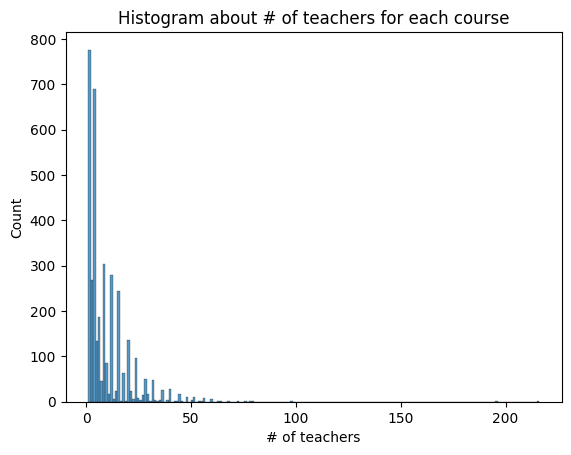

In [ ]:
sns.histplot(count_df, x='count')
plt.title('Histogram about # of teachers for each course')
plt.xlabel('# of teachers')

- Min: 1, max: 216
- Phần lớn course có số lượng teacher <= 12 (75%)
- Course số lượng teacher = 1 chiếm nhiều nhất.

Sau khi xét 4 loại attributes của course (field, concept, school, teacher), ta sẽ kiểm tra xem nếu không xét đến việc lọc bỏ những attribute có ít liên kết của course, hay những course ít người đăng ký, thì sẽ có bao nhiều course có ít nhất 1 attribute?

In [ ]:
ct_set = set(count_df['course'])
print(len(ct_set.union(cc_set).union(cf_set).union(sc_set)))

3829


3871 - 3829 = 42 course không có side information.  

Job title

Org name

In [ ]:
fil_teacher_df['org_name'].n_unique()

724

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

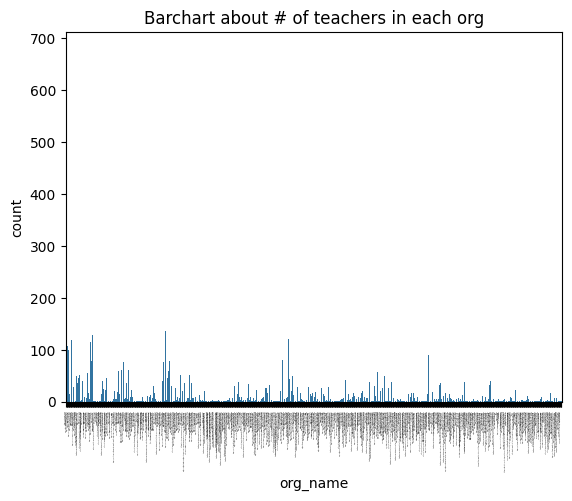

In [ ]:
sns.countplot(fil_teacher_df, x='org_name')
plt.title('Barchart about # of teachers in each org')
plt.xticks(rotation=90, fontsize=0.5)

In [ ]:
count_df = fil_teacher_df['org_name'].value_counts().sort('count', descending=True)
count_df

org_name,count
str,u32
"""đại học thanh …",678
"""đại học giao t…",375
"""đại học sơn đô…",173
"""trường cao đẳn…",153
"""đại học sư phạ…",149
"""đại học trùng …",137
"""đại học hồ bắc…",129
"""đại học công n…",127
"""cao đẳng y tế …",122


In [ ]:
count_df.describe()

describe,org_name,count
str,str,f64
"""count""","""724""",724.0
"""null_count""","""0""",0.0
"""mean""",null,13.640884
"""std""",null,35.463706
"""min""","""acca""",1.0
"""25%""",null,1.0
"""50%""",null,4.0
"""75%""",null,14.0
"""max""","""ủy ban dược lý…",678.0


In [ ]:
fil_course_teacher_df.write_csv(os.path.join(PRE_DIR, 'relations/course-teacher_eda.txt'),
                                separator='\t', include_header=False)

fil_teacher_df.write_ndjson(os.path.join(PRE_DIR, 'entities/teacher_eda.json'))

### User

In [ ]:
user_df = pl.read_ndjson(os.path.join(RAW_DIR, 'entities/user.json'))
user_df

id,name,gender,school,year_of_birth,course_order,enroll_time
str,str,i64,str,str,list[i64],list[str]
"""U_22""","""我""",0,"""""",null,"[682129, 2294668]","[""2019-10-12 10:28:02"", ""2020-11-21 14:03:28""]"
"""U_24""","""王帅国""",1,"""清华大学""",null,"[597214, 605512, … 2229905]","[""2019-05-20 16:06:48"", ""2019-05-24 19:34:43"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",null,[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""",null,"[696679, 1704639, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-12 16:17:02"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""",null,"[682442, 682164, … 1906706]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-07-20 11:27:28""]"
"""U_67""","""李小马""",1,"""学堂在线""",null,[696679],"[""2019-12-20 12:06:00""]"
"""U_68""","""秋""",2,"""清华大学""",null,"[696692, 948431]","[""2020-01-21 10:15:02"", ""2020-01-21 10:18:02""]"
"""U_69""","""培源_""",1,"""清华大学""",null,"[375775, 375778, … 880774]","[""2019-02-26 19:21:24"", ""2019-02-28 18:12:14"", … ""2019-11-06 10:14:12""]"
"""U_90""","""刘俊洋""",0,"""qinghua""",null,"[676664, 707135, … 1824921]","[""2020-04-22 18:23:28"", ""2020-04-22 21:12:21"", … ""2020-06-22 15:47:55""]"


In [ ]:
user_df = user_df.with_columns(
    pl.when(pl.col('school').str.strip() != "")
        .then(pl.col('school').str.strip()),
    pl.when(pl.col('course_order').list.len() != 0)
        .then(pl.col('course_order')),
    pl.when(pl.col('enroll_time').list.len() != 0)
        .then(pl.col('enroll_time'))
)

<ipython-input-112-e13c7e1a1f2c>:2: DeprecationWarning: `strip` is deprecated. It has been renamed to `strip_chars`.
  pl.when(pl.col('school').str.strip() != "")
<ipython-input-112-e13c7e1a1f2c>:3: DeprecationWarning: `strip` is deprecated. It has been renamed to `strip_chars`.
  .then(pl.col('school').str.strip()),


In [ ]:
user_df.describe()

describe,id,name,gender,school,year_of_birth,course_order,enroll_time
str,str,str,f64,str,str,str,str
"""count""","""3330294""","""3330240""",3.33024e6,"""1128399""","""0""","""3330294""","""3330294"""
"""null_count""","""0""","""54""",54.0,"""2201895""","""3330294""","""0""","""0"""
"""mean""",null,null,0.945575,null,null,null,null
"""std""",null,null,0.83211,null,null,null,null
"""min""","""U_10000""","""""",0.0,""" Queen's Univ…",null,null,null
"""25%""",null,null,0.0,null,null,null,null
"""50%""",null,null,1.0,null,null,null,null
"""75%""",null,null,2.0,null,null,null,null
"""max""","""U_999999""","""􏿰""",232.0,"""🚀 工程大学""",null,null,null


In [ ]:
import tqdm
import json

def load_json(fname, nrows=None, cols=None):
    samples = []
    rf = open(fname, 'r', encoding='utf-8')
    for idx, line in tqdm.tqdm(enumerate(rf)):
        if nrows and idx == nrows:
            break
        sample = {k: v for k, v in json.loads(line).items() if k in cols}
        samples.append(sample)
    rf.close()
    return pd.DataFrame(samples)

year_df = load_json('/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Data/entities/user.json',
                    cols='year_of_birth')

year_df

3330294it [00:40, 81231.98it/s] 


,year_of_birth
0,2015.0
1,6558.0
2,NaN
3,1973.0
4,NaN
...,...
3330289,NaN
3330290,NaN
3330291,NaN
3330292,NaN


Nhận xét chung:
- Trường id, name không có nhiều ý nghĩa
- Trường gender có thể được dùng để trích xuất feature cho user. Trường này có ít giá trị null, khoảng 0.0016% nên ta có thể loại bỏ những hàng này.
- Trường year_of_birth chỉ có 1.4572% user có giá trị khác null, ngoài ra còn có nhiễu (6558). Vì vậy ta nên drop bỏ cột này.
- Trường school có thể đc sử dụng để tạo feature. Tuy nhiên, quá nhiều user không để tên trường (2201895 chiếm 66.12%), ngoài ra, một số tên trường bị vô nghĩa, chứa ký tự đặc biệt như: "🚀 工程大学"; " Queen's Univ…". Vì vậy, việc dùng trường này làm feature sẽ gặp nhiều khó khăn.
- Trường course_order cho biết các khóa học mà user đăng ký
- Xét trường enroll_time, quan sát một số hàng đầu, ta có thể thấy được:
    - Định dạng thời gian: YY-MM-DD HH:MM:SS
    - Khóa học ở sau thì đăng ký gần đây hơn --> Điều này có thể hữu ích trong trường hợp bị khóa học user đăng ký ko có thời điểm đăng ký, ta vẫn có thể biết được khóa nào đăng ký trước, dễ dàng chia train/val/test split theo chiến lược leave-one-out như MOOCCubeX


Loại bỏ các hàng có gender ngoại lai, cột year_of_birth

In [ ]:
user_df['gender'].value_counts()

gender,count
i64,u32
232,1
2,1040449
3,1
1,1067858
0,1221931
null,54


In [ ]:
user_df = user_df.drop('year_of_birth') \
                .filter(pl.col('gender').is_in((0, 1, 2)))

user_df

id,name,gender,school,course_order,enroll_time
str,str,i64,str,list[i64],list[str]
"""U_22""","""我""",0,null,"[682129, 2294668]","[""2019-10-12 10:28:02"", ""2020-11-21 14:03:28""]"
"""U_24""","""王帅国""",1,"""清华大学""","[597214, 605512, … 2229905]","[""2019-05-20 16:06:48"", ""2019-05-24 19:34:43"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""","[696679, 1704639, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-12 16:17:02"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""","[682442, 682164, … 1906706]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-07-20 11:27:28""]"
"""U_67""","""李小马""",1,"""学堂在线""",[696679],"[""2019-12-20 12:06:00""]"
"""U_68""","""秋""",2,"""清华大学""","[696692, 948431]","[""2020-01-21 10:15:02"", ""2020-01-21 10:18:02""]"
"""U_69""","""培源_""",1,"""清华大学""","[375775, 375778, … 880774]","[""2019-02-26 19:21:24"", ""2019-02-28 18:12:14"", … ""2019-11-06 10:14:12""]"
"""U_90""","""刘俊洋""",0,"""qinghua""","[676664, 707135, … 1824921]","[""2020-04-22 18:23:28"", ""2020-04-22 21:12:21"", … ""2020-06-22 15:47:55""]"


Thống kê trường school

In [ ]:
user_df['school'].value_counts().sort('count', descending=True)

school,count
str,u32
null,2201839
"""清华大学""",18412
"""昆明理工大学""",15351
"""湖南大学""",13388
"""河南工业大学""",10198
"""河北工业大学""",9857
"""广西科技大学""",9331
"""华南理工大学""",8896
"""陕西工业职业技术学院""",8804


Kiểm tra xem thời gian có tăng dần trong enroll time?

In [ ]:
is_inc = True

for time_list in tqdm.tqdm(user_df['enroll_time']):
    prev_time = datetime.strptime(time_list[0], '%Y-%m-%d %H:%M:%S')
    for i in range(1, len(time_list)):
        if time_list[i] is None or time_list[i].strip() == "":
            continue

        cur_time = datetime.strptime(time_list[i], '%Y-%m-%d %H:%M:%S')

        if cur_time < prev_time:
            is_inc = False
            break

        prev_time = cur_time

    if not is_inc:
        break

is_inc

100%|██████████| 3330238/3330238 [03:22<00:00, 16460.06it/s]


True

In [ ]:
user_df.write_ndjson(os.path.join(PRE_DIR, 'entities/user_eda.json'))

Như vậy, những khóa học càng xuất hiện sau trong course_order càng được đăng ký gần đây. Tiếp đến, ta lọc bỏ khóa học không hợp lệ (không tồn tại trong course.json), lọc bỏ user không có khóa học đăng ký


In [ ]:
user_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/user_eda.json'))
user_df

id,name,gender,school,course_order,enroll_time
str,str,i64,str,list[i64],list[str]
"""U_22""","""我""",0,null,"[682129, 2294668]","[""2019-10-12 10:28:02"", ""2020-11-21 14:03:28""]"
"""U_24""","""王帅国""",1,"""清华大学""","[597214, 605512, … 2229905]","[""2019-05-20 16:06:48"", ""2019-05-24 19:34:43"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""","[696679, 1704639, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-12 16:17:02"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""","[682442, 682164, … 1906706]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-07-20 11:27:28""]"
"""U_67""","""李小马""",1,"""学堂在线""",[696679],"[""2019-12-20 12:06:00""]"
"""U_68""","""秋""",2,"""清华大学""","[696692, 948431]","[""2020-01-21 10:15:02"", ""2020-01-21 10:18:02""]"
"""U_69""","""培源_""",1,"""清华大学""","[375775, 375778, … 880774]","[""2019-02-26 19:21:24"", ""2019-02-28 18:12:14"", … ""2019-11-06 10:14:12""]"
"""U_90""","""刘俊洋""",0,"""qinghua""","[676664, 707135, … 1824921]","[""2020-04-22 18:23:28"", ""2020-04-22 21:12:21"", … ""2020-06-22 15:47:55""]"


In [ ]:
user_df

id,name,gender,school,course_order,enroll_time
str,str,i64,str,list[i64],list[str]
"""U_22""","""我""",0,null,"[682129, 2294668]","[""2019-10-12 10:28:02"", ""2020-11-21 14:03:28""]"
"""U_24""","""王帅国""",1,"""清华大学""","[597214, 605512, … 2229905]","[""2019-05-20 16:06:48"", ""2019-05-24 19:34:43"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""","[696679, 1704639, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-12 16:17:02"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""","[682442, 682164, … 1906706]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-07-20 11:27:28""]"
"""U_67""","""李小马""",1,"""学堂在线""",[696679],"[""2019-12-20 12:06:00""]"
"""U_68""","""秋""",2,"""清华大学""","[696692, 948431]","[""2020-01-21 10:15:02"", ""2020-01-21 10:18:02""]"
"""U_69""","""培源_""",1,"""清华大学""","[375775, 375778, … 880774]","[""2019-02-26 19:21:24"", ""2019-02-28 18:12:14"", … ""2019-11-06 10:14:12""]"
"""U_90""","""刘俊洋""",0,"""qinghua""","[676664, 707135, … 1824921]","[""2020-04-22 18:23:28"", ""2020-04-22 21:12:21"", … ""2020-06-22 15:47:55""]"


In [ ]:
course_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/course_eda.json'))
valid_courses = list(map(lambda x: int(x[2:]), course_df['id'].to_list()))
len(valid_courses), valid_courses[:10]

(3781,
 [584313,
  584329,
  584381,
  597208,
  597225,
  597229,
  597291,
  597307,
  597365,
  597367])

In [ ]:
course_time_df = user_df.select(['id', 'course_order', 'enroll_time']) \
        .explode('course_order', 'enroll_time') \
        .filter(pl.col('course_order').is_in(valid_courses)) \
        .sort('enroll_time') \
        .group_by('id') \
        .agg(pl.col('course_order'), pl.col('enroll_time'))
course_time_df

id,course_order,enroll_time
str,list[i64],list[str]
"""U_10000""","[680963, 2033958]","[""2020-06-07 16:51:56"", ""2020-10-27 09:07:30""]"
"""U_1000000""",[707031],"[""2020-02-11 00:20:59""]"
"""U_1000038""",[694149],"[""2020-11-17 13:49:42""]"
"""U_1000055""",[680980],"[""2020-02-20 15:23:57""]"
"""U_10001""",[697236],"[""2020-02-21 11:40:43""]"
"""U_1000129""","[735210, 799796, … 1824931]","[""2020-09-05 17:55:11"", ""2020-09-05 17:57:22"", … ""2020-11-30 20:14:04""]"
"""U_100013""",[681330],"[""2020-04-03 13:09:05""]"
"""U_1000290""",[697293],"[""2020-09-25 19:03:39""]"
"""U_1000342""","[883345, 696968, … 696927]","[""2020-02-04 12:20:33"", ""2020-02-04 12:22:04"", … ""2020-03-05 23:10:23""]"


In [ ]:
user_df = user_df.drop('course_order', 'enroll_time') \
                .join(course_time_df, on='id', how='inner')
user_df

id,name,gender,school,course_order,enroll_time
str,str,i64,str,list[i64],list[str]
"""U_22""","""我""",0,null,[682129],"[""2019-10-12 10:28:02""]"
"""U_24""","""王帅国""",1,"""清华大学""","[597314, 597208, … 2229905]","[""2019-06-12 17:22:07"", ""2019-06-17 15:22:41"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""","[696679, 943255, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-17 08:46:12"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""","[682442, 682164, … 1793742]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-06-13 15:29:18""]"
"""U_67""","""李小马""",1,"""学堂在线""",[696679],"[""2019-12-20 12:06:00""]"
"""U_68""","""秋""",2,"""清华大学""","[696692, 948431]","[""2020-01-21 10:15:02"", ""2020-01-21 10:18:02""]"
"""U_69""","""培源_""",1,"""清华大学""","[584329, 584313, … 875624]","[""2019-05-08 15:15:56"", ""2019-05-08 15:33:30"", … ""2019-11-05 11:51:59""]"
"""U_90""","""刘俊洋""",0,"""qinghua""","[676664, 707135, … 1824921]","[""2020-04-22 18:23:28"", ""2020-04-22 21:12:21"", … ""2020-06-22 15:47:55""]"


In [ ]:
user_df.write_ndjson(os.path.join(PRE_DIR, 'entities/user_eda.json'))

In [ ]:
user_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/user_eda.json'))

In [ ]:
# group by đảm bảo thứ tự của các phần tử nhưng để chắc chắn, ta sẽ kiểm tra lại lần nữa
is_inc = True

for time_list in tqdm.tqdm(user_df['enroll_time']):
    prev_time = datetime.strptime(time_list[0], '%Y-%m-%d %H:%M:%S')
    for i in range(1, len(time_list)):
        if time_list[i] is None or time_list[i].strip() == "":
            continue

        cur_time = datetime.strptime(time_list[i], '%Y-%m-%d %H:%M:%S')

        if cur_time < prev_time:
            is_inc = False
            break

        prev_time = cur_time

    if not is_inc:
        break

is_inc

100%|██████████| 3210993/3210993 [03:39<00:00, 14657.56it/s]


True

Thống kê số lượng user cho từng giới tính

Text(0.5, 1.0, '# of users in each gender')

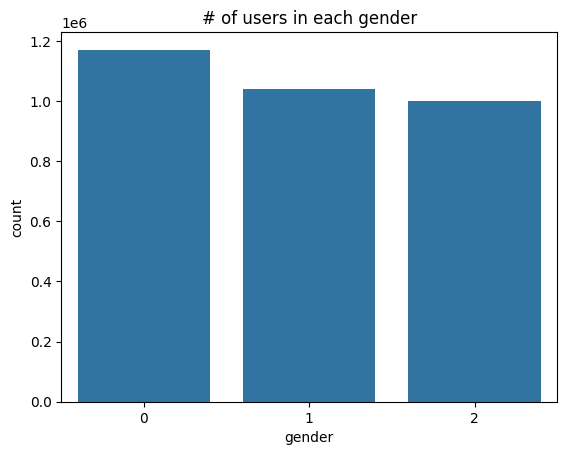

In [ ]:
count_df = user_df['gender'].value_counts()

sns.barplot(count_df, x='gender', y='count')
plt.title('# of users in each gender')

Thống kê số lượng khóa học cho từng nhóm giới tính

Text(0.5, 1.0, '# of courses in each gender')

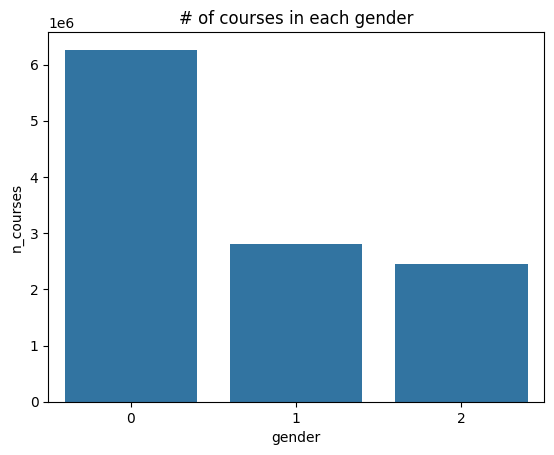

In [ ]:
count_df = user_df.select('gender', 'course_order') \
                    .with_columns(pl.col('course_order').list.len().alias('n_courses')) \
                    .drop('course_order') \
                    .group_by('gender') \
                    .agg(pl.col('n_courses').sum())

sns.barplot(count_df, x='gender', y='n_courses')
plt.title('# of courses in each gender')

Thống kê số lượng khóa học của từng user

In [ ]:
count_df = user_df.select('course_order') \
                    .with_columns(pl.col('course_order').list.len())

count_df.describe()

describe,course_order
str,f64
"""count""",3.210993e6
"""null_count""",0.0
"""mean""",3.588616
"""std""",10.485218
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",2.0
"""max""",3291.0


In [ ]:
# histplot mat kha nhieu thoi gian de ve
sns.histplot(count_df, x='course_order')
plt.title('Histogram of # of courses of each user')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7af834e283a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
len(count_df.filter(pl.col('course_order') > 5)), len(count_df.filter(pl.col('course_order') > 10))

(305193, 166852)

- Số lượng user thuộc mỗi gender khá cân bằng
- Số lượng khóa học của các user thuộc gender 0 nhiều hơn đáng kể so với 1, 2.

Điều này một phần cho thấy, yếu tố gender có ảnh hưởng đến số lượng khóa học đăng ký. Nhưng để rõ hơn ta sẽ thực hiện thống kê phân tích.3

### Video

Phần này tập trung vào bảng video, user-video, course, video_id-ccid. Đầu tiên, ta sẽ xem xét trường resource của course, do ta chỉ quan tâm đến các thông tin về video, nên sẽ chỉ giữ lại video mà xóa tài nguyên bài tập.

In [ ]:
course_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/course_eda.json'))
course_df

id,name,prerequisites,about,resource,name_trans,about_trans,about_segmented,name_segmented,field
str,str,str,str,list[struct[3]],str,str,str,str,list[str]
"""C_584313""","""《资治通鉴》导读""","""""","""通过老师导读，同学们可深入这…","[{[""第一课 导论与三家分晋"", ""导论"", ""导论""],""V_849"",""1.1.1""}, {[""第一课 导论与三家分晋"", ""智伯的覆亡"", ""智伯的覆亡""],""V_850"",""1.2.1""}, … {[""第十五课 隋唐霸业"", null, ""第十五课 隋唐霸业--习题""],""Ex_957"",""15.8""}]","""giới thiệu về …","""thông qua sự h…","""thông_qua sự h…","""giới_thiệu về …","[""lịch sử"", ""trường dạy tiếng trung""]"
"""C_584329""","""微积分——极限理论与一元函数…","""""","""本课程是理工科的一门数学基础…","[{[""序言"", ""序言"", ""序言""],""V_1350"",""1.1.1""}, {[""第一章 实数与函数"", ""第一节 实数集的界与确界"", ""实数集的界""],""V_1351"",""2.1.1""}, … {[""第八章 级数"", null, ""第八章 级数--第六节思考与练习""],""Ex_1545"",""9.9""}]","""giải tích - lý…","""khóa học này l…","""khoá học này l…","""giải_tích - lý…","[""toán học"", ""kinh tế học ứng dụng"", … ""kinh tế lý thuyết""]"
"""C_584381""","""新闻摄影""","""""","""掌握基本的摄影技能，了解图片…","[{[""第一章 绪论"", ""第一讲 引言1"", ""引言1""],""V_1800"",""1.1.1""}, {[""第一章 绪论"", ""第二讲 引言2"", ""引言2""],""V_1801"",""1.2.1""}, … {[""大作业提交"", null, ""《大作业》提交--小节""],""Ex_1926"",""20.4""}]","""chụp ảnh tin t…","""nắm vững các k…","""nắm vững các k…","""chụp ảnh tin_t…","[""báo chí"", ""nghệ thuật""]"
"""C_597208""","""数据挖掘：理论与算法""","""""","""最有趣的理论+最有用的算法=…","[{[""走进数据科学：博大精深，美不胜收"", ""整装待发"", ""Video""],""V_2961"",""1.1.1""}, {[""走进数据科学：博大精深，美不胜收"", ""学而不思则罔"", ""Video""],""V_2962"",""1.3.1""}, … {[""美丽数据说：阆苑仙葩，美玉无瑕"", null, ""第十一章第一节测试题""],""Ex_3104"",""11.1""}]","""khai thác dữ l…","""lý thuyết thú …","""lý_thuyết thú_…","""khai_thác dữ_l…","[""khoa học và công nghệ máy tính""]"
"""C_597225""","""大学计算机""","""""","""大学计算机课程将以计算思维为…","[{[""第1周： 基于计算机的问题求解"", ""课程介绍"", ""开篇""],""V_4596"",""1.1.1""}, {[""第1周： 基于计算机的问题求解"", ""1.0 本章导学"", ""1.0 本章导学""],""V_4597"",""1.2.1""}, … {[""第9周：算法与程序设计"", null, ""第九周测验""],""Ex_4827"",""10.12""}]","""máy tính đại h…","""các khóa học m…","""các khoá học m…","""máy_tính đại_h…",null
"""C_597229""","""财务分析与决策""","""""","""这门课程用财务语言解构企业的…","[{[""资金的运用——认识资产"", ""1.1 绪论"", ""绪论""],""V_5042"",""2.1.1""}, {[""资金的运用——认识资产"", ""1.2 认识资产负债表"", ""认识资产负债表""],""V_5043"",""2.2.1""}, … {[""期末大作业——主观题"", null, ""期末主观题""],""Ex_5144"",""12.2""}]","""phân tích tài …","""khóa học này s…","""khoá học này s…","""phân_tích tài_…","[""kinh tế học ứng dụng"", ""khoa học và kỹ thuật quản lý""]"
"""C_597291""","""高级英语写作""","""""","""本课程能够帮助学生掌握英语段…","[{[""Chapter One Paragraph Writing"", ""1.1 Parts of a Paragraph"", ""1.1 Parts of a Paragraph""],""V_8379"",""1.1.1""}, {[""Chapter One Paragraph Writing"", ""1.2 Four Steps in Writing"", ""1.2.1 Step 1- Begin with a point""],""V_8380"",""1.2.1""}, … {[""Chapter Five Research Paper Writing"", null, ""Chapter Five Research Paper Writing""],""Ex_8432"",""5.3""}]","""viết tiếng anh…","""khóa học này c…","""khoá học này c…","""viết tiếng anh…",null
"""C_597307""","""大唐兴衰""","""""","""隋唐五代史是史学名著《资治通…","[{[""第一课、隋朝开基"", ""第一节 隋帝杨坚"", ""第一节 隋帝杨坚""],""V_9394"",""1.1.1""}, {[""第一课、隋朝开基"", ""第二节 杨隋代周"", ""第二节 杨隋代周""],""V_9395"",""1.2.1""}, … {[""第十二课、落日长安"", null, ""第十二课、落日长安--习题""],""Ex_9464"",""12.5""}]","""sự thăng trầm …","""lịch sử nhà tù…","""lịch_sử nhà tu…","""sự thăng_trầm …","[""lịch sử""]"
"""C_597365""","""五分钟轻松搞定职场礼仪（20…","""""","""职场“礼”为先，成功的未来不…","[{[""课程介绍动画：职场“礼”为先，成功的未来不是梦"", ""课程介绍动画"", ""课程介绍动画 — 职场“礼”为先，成功的未来不是梦""],""V_15713"",""1.1.1""}, {[""第一章 塑造优雅、大方、可亲的职业形象"", ""第一节 坐姿篇"", ""本讲导学 坐姿""],""V_15714"",""2.1.1""}, … {[""第五章 应对繁杂、多变、细致的文化差异"", ""第四节 欧美篇"", ""授课视频 讲义 — 欧美各国礼仪""],""V_15800"",""6.4.1""}]","""dễ dàng nắm vữ…","""“nghi thức” đư…","""“ nghi_thức ” …","""dễ_dàng nắm vữ…",null


In [ ]:
course_df = course_df.with_columns(
        pl.col('resource').map_elements(lambda rs_list: [rs for rs in rs_list if rs['resource_id'].startswith('V_')]).alias('videos')
    ).drop('resource')
course_df

id,name,prerequisites,about,name_trans,about_trans,about_segmented,name_segmented,field,videos
str,str,str,str,str,str,str,str,list[str],list[struct[3]]
"""C_584313""","""《资治通鉴》导读""","""""","""通过老师导读，同学们可深入这…","""giới thiệu về …","""thông qua sự h…","""thông_qua sự h…","""giới_thiệu về …","[""lịch sử"", ""trường dạy tiếng trung""]","[{[""第一课 导论与三家分晋"", ""导论"", ""导论""],""V_849"",""1.1.1""}, {[""第一课 导论与三家分晋"", ""智伯的覆亡"", ""智伯的覆亡""],""V_850"",""1.2.1""}, … {[""第十五课 隋唐霸业"", ""第十五课 隋唐霸业：三人行"", ""第十五课 隋唐霸业：三人行""],""V_956"",""15.7.1""}]"
"""C_584329""","""微积分——极限理论与一元函数…","""""","""本课程是理工科的一门数学基础…","""giải tích - lý…","""khóa học này l…","""khoá học này l…","""giải_tích - lý…","[""toán học"", ""kinh tế học ứng dụng"", … ""kinh tế lý thuyết""]","[{[""序言"", ""序言"", ""序言""],""V_1350"",""1.1.1""}, {[""第一章 实数与函数"", ""第一节 实数集的界与确界"", ""实数集的界""],""V_1351"",""2.1.1""}, … {[""第八章 级数"", ""第六节 傅里叶级数"", ""Video""],""V_1539"",""9.12.4""}]"
"""C_584381""","""新闻摄影""","""""","""掌握基本的摄影技能，了解图片…","""chụp ảnh tin t…","""nắm vững các k…","""nắm vững các k…","""chụp ảnh tin_t…","[""báo chí"", ""nghệ thuật""]","[{[""第一章 绪论"", ""第一讲 引言1"", ""引言1""],""V_1800"",""1.1.1""}, {[""第一章 绪论"", ""第二讲 引言2"", ""引言2""],""V_1801"",""1.2.1""}, … {[""特别篇 奔跑吧姐妹第二期"", ""结束语"", ""课程结束语""],""V_1923"",""19.5.1""}]"
"""C_597208""","""数据挖掘：理论与算法""","""""","""最有趣的理论+最有用的算法=…","""khai thác dữ l…","""lý thuyết thú …","""lý_thuyết thú_…","""khai_thác dữ_l…","[""khoa học và công nghệ máy tính""]","[{[""走进数据科学：博大精深，美不胜收"", ""整装待发"", ""Video""],""V_2961"",""1.1.1""}, {[""走进数据科学：博大精深，美不胜收"", ""学而不思则罔"", ""Video""],""V_2962"",""1.3.1""}, … {[""美丽数据说：阆苑仙葩，美玉无瑕"", ""南国紫荆亦芬芳"", ""Video""],""V_3102"",""11.3.1""}]"
"""C_597225""","""大学计算机""","""""","""大学计算机课程将以计算思维为…","""máy tính đại h…","""các khóa học m…","""các khoá học m…","""máy_tính đại_h…",null,"[{[""第1周： 基于计算机的问题求解"", ""课程介绍"", ""开篇""],""V_4596"",""1.1.1""}, {[""第1周： 基于计算机的问题求解"", ""1.0 本章导学"", ""1.0 本章导学""],""V_4597"",""1.2.1""}, … {[""第9周：算法与程序设计"", ""知识扩展——人人都该学编程吗"", ""知识扩展""],""V_4823"",""10.10.1""}]"
"""C_597229""","""财务分析与决策""","""""","""这门课程用财务语言解构企业的…","""phân tích tài …","""khóa học này s…","""khoá học này s…","""phân_tích tài_…","[""kinh tế học ứng dụng"", ""khoa học và kỹ thuật quản lý""]","[{[""资金的运用——认识资产"", ""1.1 绪论"", ""绪论""],""V_5042"",""2.1.1""}, {[""资金的运用——认识资产"", ""1.2 认识资产负债表"", ""认识资产负债表""],""V_5043"",""2.2.1""}, … {[""财务分析与决策的实际应用"", ""10.6 中国国际金融有限公司研究部副总经理朱亚锋谈财务分析与证券投资决策"", ""10.6 中国国际金融有限公司研究部副总经理朱亚锋谈财务分析与证券投资决策""],""V_5142"",""11.6.1""}]"
"""C_597291""","""高级英语写作""","""""","""本课程能够帮助学生掌握英语段…","""viết tiếng anh…","""khóa học này c…","""khoá học này c…","""viết tiếng anh…",null,"[{[""Chapter One Paragraph Writing"", ""1.1 Parts of a Paragraph"", ""1.1 Parts of a Paragraph""],""V_8379"",""1.1.1""}, {[""Chapter One Paragraph Writing"", ""1.2 Four Steps in Writing"", ""1.2.1 Step 1- Begin with a point""],""V_8380"",""1.2.1""}, … {[""Chapter Five Research Paper Writing"", ""5.2 Writing Reseach Paper"", ""5.2.8 The Body of the Research Paper""],""V_8431"",""5.2.8""}]"
"""C_597307""","""大唐兴衰""","""""","""隋唐五代史是史学名著《资治通…","""sự thăng trầm …","""lịch sử nhà tù…","""lịch_sử nhà tu…","""sự thăng_trầm …","[""lịch sử""]","[{[""第一课、隋朝开基"", ""第一节 隋帝杨坚"", ""第一节 隋帝杨坚""],""V_9394"",""1.1.1""}, {[""第一课、隋朝开基"", ""第二节 杨隋代周"", ""第二节 杨隋代周""],""V_9395"",""1.2.1""}, … {[""第十二课、落日长安"", ""第四节 五代残唐"", ""第四节 五代残唐""],""V_9463"",""12.4.1""}]"
"""C_597365""","""五分钟轻松搞定职场礼仪（20…","""""","""职场“礼”为先，成功的未来不…","""dễ dàng nắm vữ…","""“nghi thức” đư…","""“ nghi_thức ” …","""dễ_dàng nắm vữ…",null,"[{[""课程介绍动画：职场“礼”为先，成功的未来不是梦"", ""课程介绍动画"", ""课程介绍动画 — 职场“礼”为先，成功的未来不是梦""],""V_15713"",""1.1.1""}, {[""第一章 塑造优雅、大方、可亲的职业形象"", ""第一节 坐姿篇"", ""本讲导学 坐姿""],""V_15714"",""2.1.1""}, … {[""第五章 应对繁杂、多变、细致的文化差异"", ""第四节 欧美篇"", ""授课视频 讲义 — 欧美各国礼仪""],""V_15800"",""6.4.1""}]"


Text(0.5, 0, '# of videos')

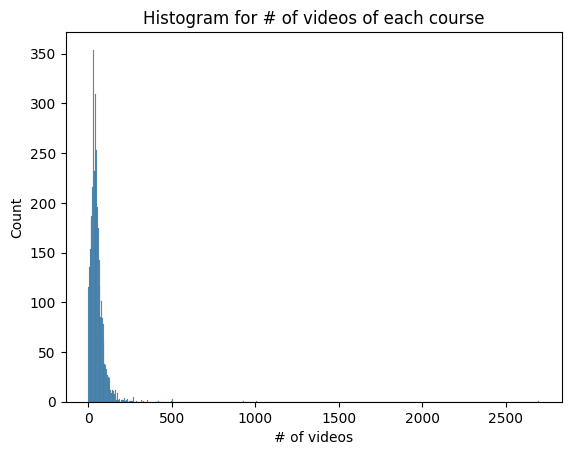

In [ ]:
count_df = course_df.with_columns(pl.col('videos').list.len().alias('n_videos')) \
                    .select('n_videos')

sns.histplot(count_df, x='n_videos')
plt.title('Histogram for # of videos of each course')
plt.xlabel('# of videos')

In [ ]:
count_df.describe()

describe,n_videos
str,f64
"""count""",3781.0
"""null_count""",0.0
"""mean""",53.879397
"""std""",64.947221
"""min""",0.0
"""25%""",28.0
"""50%""",44.0
"""75%""",66.0
"""max""",2700.0


- Phần lớn course có số lượng videos >= 28 (25%)
- Vẫn tồn tại các course không có videos nào. Vì nhóm xem đây chỉ là một thông tin phụ trợ cho một số phương pháp nên nhóm sẽ không xóa những course không có video (không có thời gian của course). Thay vào đó, nếu ta có thể lấy trung bình thời lượng của các khóa có video để điền vào.
- Tuy nhiên, có thể course sẽ chứa những video không hợp lệ. Vì vậy ta cần xét thêm video.json và vid_ccid

In [21]:
video_df = pl.read_ndjson(os.path.join(RAW_DIR, 'entities/video.json'))
video_df

ccid,name,start,end,text
str,str,list[f64],list[f64],list[str]
"""0001603F826A3D…","""Video""","[1.031, 7.095, … 504.247]","[4.255, 8.119, … 509.095]","[""第二个就是短助记符在生成上面。有一个规定"", ""短助记符是这样说"", … ""那么它的要求在它都会在那个命令集的定义的时候把它明确的说出来。""]"
"""0003DB14A14A53…","""Video""","[11.799, 12.581, … 365.129]","[12.581, 17.38, … 367.336]","[""大家好"", ""今天我们讨论一维系统辐射传递一般近似解"", … ""多维系统下的通用问题""]"
"""0004A5C6F07E36…","""家禽的消化系统""","[19.2, 20.84, … 491.277]","[20.83, 23.39, … 492.315]","[""各位同学 大家好"", ""我是来自中国农业大学的曹静"", … ""是胰腺""]"
"""00059EBD1371A6…","""1.2 计算机硬件系统""","[19.372, 190.522, … 626.853]","[23.14, 194.458, … 630.757]","[""大家好 本视频介绍计算机硬件系统"", ""总线就其类别来说 在计算机系统当中包括"", … ""待数据交换结束之后 再中断CPU善后""]"
"""0005D1DC01B4EF…","""什么是供应链网络""","[24.33, 25.081, … 408.031]","[25.08, 26.775, … 408.75]","[""大家好"", ""今天我们学习的知识点"", … ""谢谢大家""]"
"""0007919ED7652A…","""1.2 英语文字的起源""","[6.29, 7.31, … 504.99]","[7.26, 9.97, … 506.57]","[""同学们好"", ""今天我们开始《英汉语言对比》课程的"", … ""同学们 再见""]"
"""0007C4A5229EE3…","""7.2.3 第三课时""","[11.1, 19.5, … 1189.26]","[13.1, 22.42, … 1190.78]","[""第二节代理权"", ""授权不明的情况还是大量存在的"", … ""关于无权代理""]"
"""0008C8CC056F4E…","""Goodbye and Si…","[1.17, 3.57, … 126.12]","[3.57, 5.31, … 130.309]","[""好了 就是这样"", ""我要跟你们说再见了"", … ""好吧 那么再见 后会有期""]"
"""000948D39EA6B0…","""Video""","[13.25, 16.66, … 420.02]","[16.66, 19.49, … 421.32]","[""我觉得咱们上了一学期的课"", ""其实我一直在说清华大学"", … ""好 谢谢大家""]"


In [23]:
video_df.describe()

describe,ccid,name,start,end,text
str,str,str,str,str,str
"""count""","""59581""","""59581""","""59581""","""59581""","""59581"""
"""null_count""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null
"""std""",null,null,null,null,null
"""min""","""0001603F826A3D…",""" 数据的输入和输出""",null,null,null
"""25%""",null,null,null,null,null
"""50%""",null,null,null,null,null
"""75%""",null,null,null,null,null
"""max""","""FFFF3CC4C6F66F…","""（四）民族资本主义经济的状况…",null,null,null


- name, text không có quá nhiều ý nghĩa
- start, end: giúp xác định thời lượng của video

In [ ]:
vid_ccid = pl.read_csv(os.path.join(RAW_DIR, 'relations/video_id-ccid.txt'),
                       separator='\t', has_header=False, new_columns=['video_id', 'ccid'])

vid_ccid

video_id,ccid
str,str
"""V_234845""","""0000363DB5B6E0…"
"""V_234876""","""0000363DB5B6E0…"
"""V_234907""","""0000363DB5B6E0…"
"""V_293392""","""0000363DB5B6E0…"
"""V_293445""","""0000363DB5B6E0…"
"""V_293494""","""0000363DB5B6E0…"
"""V_627142""","""0000363DB5B6E0…"
"""V_944346""","""0000363DB5B6E0…"
"""V_944377""","""0000363DB5B6E0…"


Mỗi course sẽ có các video_id. một ccid có thể tương ứng với nhiều video_id. Để thuận tiện sau này, ta sẽ map tất cả video_id thành ccid trong course. Nếu video_id không tồn tại trong liên kết với ccid hay ccid không tồn tại trong video, ta sẽ cho thành null

In [ ]:
vid_set = set()

for videos in course_df['videos']:
    for video in videos:
        vid_set.add(video['resource_id'])

len(vid_set)

203718

Lọc bỏ bớt các vid_ccid chứa vid không có trong course


In [ ]:
vid_ccid = vid_ccid.filter(pl.col('video_id').is_in(vid_set))
vid_ccid.shape

(201321, 2)

In [ ]:
201321 / 2798892

0.07192882040464584

Chỉ có khoảng 7% là có liên kết có ý nghĩa.

In [ ]:
ccid_set = set(vid_ccid['ccid'])

video_df = video_df.filter(pl.col('ccid').is_in(ccid_set))

1 - len(set(video_df['ccid'])) / len(ccid_set)

0.6306527897212808

Trong vid-ccid, có tới 63% ccid không tồn tại trong video.json. Như vậy, ta sẽ bỏ qua việc sử dụng thông tin về thời gian

## 2. Xử lý dữ liệu

Ở giai đoạn đầu, ta đã thực hiện thống kê mô tả, trực quan hóa dữ liệu kết hợp với 1 số thao tác xử lý dữ liệu như:
- Kiểm tra số lượng giá trị null tại một số cột có ý nghĩa cho việc trích xuất đặc trưng.
- Xử lý giá trị bị thiếu:
    - Loại bỏ các user không có gender là null (54 users)
    - Loại bỏ cột year_of_birth có quá nhiều null
- Xử lý nhiễu:
    - Lọc bỏ các liên kết có course hay attributes không hợp lệ.
    - Loại bỏ các course đăng ký không hợp lệ (không tồn tại trong course.json) của user
    - Loại bỏ các user có gender ngoại
    - Không sử dụng thông tin mức độ hoàn thành khóa học của user vì có tới 63% video không tồn tại
- Xử lý dữ liệu không nhất quán:
    - Hợp các field của course lại với nhau.

## 3. Phân tích thống kê

In [ ]:
import scipy

Phương sai ANOVA
- Kiểm định xem nhóm giới tính có ảnh hưởng đến số lượng khóa học đăng ký hay không
- Giả thuyết null: Nhóm giới tính không ảnh hưởng
- Giả thuyết đối: Nhóm giới tính có ảnh hưởng

In [ ]:
g_nc = user_df.select('gender', 'course_order') \
                .with_columns(pl.col('course_order').list.len()) \
                .rename({'course_order': 'n_courses'}) \

g0 = g_nc.filter(pl.col('gender') == 0).select('n_courses')
g1 = g_nc.filter(pl.col('gender') == 1).select('n_courses')
g2 = g_nc.filter(pl.col('gender') == 2).select('n_courses')

f, p = scipy.stats.f_oneway(g0, g1, g2)
print(f'Thống kê f  : {f}')
print(f'p-value     : {p}')

Thống kê f  : [26606.91252138]
p-value     : [0.]


p-value < 0.05 --> Có sự khác nhau với số lượng khóa học đăng ký giữa 3 nhóm giới tính

## 4. Khai phá tri thức

Do số lượng user khá nhiều, và phần lớn user có số lượng khóa học đăng ký khá ít (Hơn 75% users có số khóa học <= 2). Vì vậy, nhóm sẽ filter lấy users có số lượng courses >= 5.

In [ ]:
transactions = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/user_eda.json')) \
                        .select('course_order') \
                        .with_columns(pl.col('course_order').list.len().alias('n_courses')) \
                        .filter(pl.col('n_courses') >= 5) \
                        .drop('n_courses')['course_order'].to_list()

transactions[:5]

[[597314,
  597208,
  682129,
  674910,
  707038,
  682312,
  696994,
  707360,
  758201,
  681088,
  758221,
  808654,
  735214,
  879040,
  682485,
  681655,
  697265,
  1025064,
  697288,
  707456,
  936973,
  677038,
  936913,
  696946,
  1428968,
  1748240,
  1756063,
  1778415,
  682530,
  1794464,
  1795810,
  1836502,
  948415,
  948410,
  1808023,
  681414,
  1894860,
  1903985,
  1764851,
  2229905],
 [696679, 943255, 682164, 1771179, 1836502, 1794464],
 [682442, 682164, 1748240, 1794464, 697791, 1793742],
 [584329, 584313, 597225, 679390, 696994, 697791, 696911, 875624],
 [676664, 707135, 696968, 696994, 1824921]]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [ ]:
# Chuyển đổi dữ liệu thành dạng one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,584313,584329,584381,597208,597225,597229,597291,597307,597314,597365,...,2342511,2342512,2342515,2342518,2342532,2343056,2343067,2343133,2343522,2344479
0,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Sử dụng fpgrowth để tìm các mẫu phổ biến
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.185290,(696994)
1,0.062076,(948410)
2,0.048478,(879040)
3,0.046825,(1428968)
4,0.044648,(735214)
...,...,...
1397,0.010121,"(922867, 679390)"
1398,0.011080,"(735123, 679390)"
1399,0.010670,"(735123, 916828)"
1400,0.010767,"(758208, 679390)"


In [ ]:
# Sử dụng association_rules để tạo ra các quy tắc kết hợp
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(948410),(696700),0.062076,0.103303,0.010022,0.161453,1.562902,0.003610,1.069346,0.384002
1,(696700),(948410),0.103303,0.062076,0.010022,0.097018,1.562902,0.003610,1.038697,0.401657
2,(948410),(697791),0.062076,0.139220,0.011482,0.184968,1.328602,0.002840,1.056130,0.263698
3,(697791),(948410),0.139220,0.062076,0.011482,0.082474,1.328602,0.002840,1.022232,0.287331
4,(948410),(629559),0.062076,0.119984,0.014332,0.230875,1.924216,0.006884,1.144179,0.512097
...,...,...,...,...,...,...,...,...,...,...
1771,(916828),(735123),0.077565,0.033061,0.010670,0.137569,4.161018,0.008106,1.121178,0.823553
1772,(758208),(679390),0.031045,0.078778,0.010767,0.346821,4.402512,0.008321,1.410367,0.797619
1773,(679390),(758208),0.078778,0.031045,0.010767,0.136674,4.402512,0.008321,1.122352,0.838948
1774,(758208),(916828),0.031045,0.077565,0.010183,0.328013,4.228900,0.007775,1.372698,0.787995


In [ ]:
# Dự đoán course_order cho các học viên mới
def predict_course_order(new_student_courses, rules):
    predicted_course_order = set()

    for index, rule in rules.iterrows():
        if all(course in new_student_courses for course in rule['antecedents']):
            predicted_course_order.update(rule['consequents'])

    return predicted_course_order

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Giả định `new_student_courses` là một danh sách các khóa học mà một học viên mới muốn đăng ký
new_student_courses = [746997]

# Dự đoán course_order cho học viên mới
predicted_order = predict_course_order(new_student_courses, rules)

print("Recommended course order:", predicted_order)

Recommended course order: {697018, 782555, 696679}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Làm sạch dữ liệu

## 1. Xử lý dữ liệu trùng lắp

### Course

In [ ]:
course_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/course_eda.json'))
course_df.head()

id,name,prerequisites,about,resource,name_trans,about_trans,about_segmented,name_segmented,field
str,str,str,str,list[struct[3]],str,str,str,str,list[str]
"""C_584313""","""《资治通鉴》导读""","""""","""通过老师导读，同学们可深入这…","[{[""第一课 导论与三家分晋"", ""导论"", ""导论""],""V_849"",""1.1.1""}, {[""第一课 导论与三家分晋"", ""智伯的覆亡"", ""智伯的覆亡""],""V_850"",""1.2.1""}, … {[""第十五课 隋唐霸业"", null, ""第十五课 隋唐霸业--习题""],""Ex_957"",""15.8""}]","""giới thiệu về …","""thông qua sự h…","""thông_qua sự h…","""giới_thiệu về …","[""lịch sử"", ""trường dạy tiếng trung""]"
"""C_584329""","""微积分——极限理论与一元函数…","""""","""本课程是理工科的一门数学基础…","[{[""序言"", ""序言"", ""序言""],""V_1350"",""1.1.1""}, {[""第一章 实数与函数"", ""第一节 实数集的界与确界"", ""实数集的界""],""V_1351"",""2.1.1""}, … {[""第八章 级数"", null, ""第八章 级数--第六节思考与练习""],""Ex_1545"",""9.9""}]","""giải tích - lý…","""khóa học này l…","""khoá học này l…","""giải_tích - lý…","[""toán học"", ""kinh tế học ứng dụng"", … ""kinh tế lý thuyết""]"
"""C_584381""","""新闻摄影""","""""","""掌握基本的摄影技能，了解图片…","[{[""第一章 绪论"", ""第一讲 引言1"", ""引言1""],""V_1800"",""1.1.1""}, {[""第一章 绪论"", ""第二讲 引言2"", ""引言2""],""V_1801"",""1.2.1""}, … {[""大作业提交"", null, ""《大作业》提交--小节""],""Ex_1926"",""20.4""}]","""chụp ảnh tin t…","""nắm vững các k…","""nắm vững các k…","""chụp ảnh tin_t…","[""báo chí"", ""nghệ thuật""]"
"""C_597208""","""数据挖掘：理论与算法""","""""","""最有趣的理论+最有用的算法=…","[{[""走进数据科学：博大精深，美不胜收"", ""整装待发"", ""Video""],""V_2961"",""1.1.1""}, {[""走进数据科学：博大精深，美不胜收"", ""学而不思则罔"", ""Video""],""V_2962"",""1.3.1""}, … {[""美丽数据说：阆苑仙葩，美玉无瑕"", null, ""第十一章第一节测试题""],""Ex_3104"",""11.1""}]","""khai thác dữ l…","""lý thuyết thú …","""lý_thuyết thú_…","""khai_thác dữ_l…","[""khoa học và công nghệ máy tính""]"
"""C_597225""","""大学计算机""","""""","""大学计算机课程将以计算思维为…","[{[""第1周： 基于计算机的问题求解"", ""课程介绍"", ""开篇""],""V_4596"",""1.1.1""}, {[""第1周： 基于计算机的问题求解"", ""1.0 本章导学"", ""1.0 本章导学""],""V_4597"",""1.2.1""}, … {[""第9周：算法与程序设计"", null, ""第九周测验""],""Ex_4827"",""10.12""}]","""máy tính đại h…","""các khóa học m…","""các khoá học m…","""máy_tính đại_h…",null


In [ ]:
print('# of id duplicates: ', course_df['id'].shape[0] - course_df['id'].n_unique())
print('# of row duplicates: ', course_df.shape[0] - course_df.drop('resource', 'field').n_unique())

# of id duplicates:  0
# of row uplicates:  0


### School

In [ ]:
course_school_df = pl.read_csv(os.path.join(PRE_DIR, 'relations/course-school_eda.txt'),
                        separator='\t', has_header=False, new_columns=['course', 'school'])

course_school_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


course,school
str,str
"""C_584313""","""S_1"""
"""C_584329""","""S_1"""
"""C_584381""","""S_1"""
"""C_597208""","""S_1"""
"""C_597225""","""S_6"""


In [ ]:
print('# of row duplicates: ', course_school_df.shape[0] - course_school_df.n_unique())

# of row duplicates:  0


### Teacher

In [ ]:
teacher_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/teacher_eda.json'))
teacher_df.head()

id,name,name_en,about,job_title,org_name,about_trans
str,str,str,str,str,str,str
"""T_1""","""刘燕妮""","""Yanni Liu""","""北大哲学系毕业，清华大学马克…","""giảng viên""","""đại học thanh …","""tốt nghiệp kho…"
"""T_2""","""陈怡""","""Yi Chen""","""1945年生于重庆，1967…","""giáo sư""","""đại học thanh …","""sinh năm 1945 …"
"""T_3""","""程钢""","""Gang Cheng""","""程钢，《庄子哲学导读》课程负…","""phó giáo sư""","""đại học thanh …","""cheng gang là …"
"""T_4""","""谢维和""",null,"""谢维和，博士、教授、博士生导…","""giáo sư""","""đại học thanh …","""xie weihe, tiế…"
"""T_5""","""史静寰""","""Jing-huan Shi""","""史静寰，女，清华大学教育研究…","""giáo sư""","""đại học thanh …","""shi jinghuan, …"


In [ ]:
print('# of id duplicates: ', teacher_df['id'].shape[0] - teacher_df['id'].n_unique())
print('# of row duplicates: ', teacher_df.shape[0] - teacher_df.drop('resource', 'field').n_unique())

# of id duplicates:  0
# of row duplicates:  0


In [ ]:
course_teacher = pl.read_csv(os.path.join(PRE_DIR, 'relations/course-teacher_eda.txt'),
                        separator='\t', has_header=False, new_columns=['course', 'teacher'])

course_teacher.shape, course_teacher.head()

((35593, 2),
 shape: (5, 2)
 ┌──────────┬─────────┐
 │ course   ┆ teacher │
 │ ---      ┆ ---     │
 │ str      ┆ str     │
 ╞══════════╪═════════╡
 │ C_584313 ┆ T_20    │
 │ C_584329 ┆ T_21    │
 │ C_584329 ┆ T_22    │
 │ C_584381 ┆ T_23    │
 │ C_597208 ┆ T_28    │
 └──────────┴─────────┘)

In [ ]:
print('# of row duplicates: ', course_teacher.shape[0] - course_teacher.n_unique())

# of row duplicates:  22281


In [ ]:
course_teacher = course_teacher.unique()
print(
    course_teacher.group_by('teacher').count().filter(pl.col('count') >= 3).shape,
    course_teacher.group_by('teacher').count().filter(pl.col('count') >= 5).shape,
)

(600, 2) (93, 2)


In [ ]:
course_teacher.group_by('course').count().filter(pl.col('count') >= 5).sort('count', descending=True)

course,count
str,u32
"""C_734024""",49
"""C_769301""",49
"""C_1924175""",44
"""C_1904668""",44
"""C_1683594""",38
"""C_1766167""",37
"""C_681031""",36
"""C_881112""",34
"""C_854832""",24


In [ ]:
course_teacher.write_csv(os.path.join(PRE_DIR, 'relations/course-teacher_eda.txt'),
                         separator='\t', include_header=False)

### Concept

In [ ]:
course_concept_df = pl.read_csv(os.path.join(PRE_DIR, 'relations/concept-course_eda.txt'),
                        separator='\t', has_header=False, new_columns=['course', 'school'])

course_concept_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


course,school
str,str
"""K_相电源_控制科学与工程""","""C_681460"""
"""K_控制线缆_控制科学与工程…","""C_681460"""
"""K_pid指令_控制科学与工…","""C_681460"""
"""K_控制自动化_控制科学与工…","""C_681460"""
"""K_转换负值_控制科学与工程…","""C_681460"""


In [ ]:
print('# of row duplicates: ', course_concept_df.shape[0] - course_concept_df.n_unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# of row duplicates:  0


### User

In [ ]:
user_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities/user_eda.json'))
user_df.head()

id,name,gender,school,course_order,enroll_time
str,str,i64,str,list[i64],list[str]
"""U_22""","""我""",0,null,[682129],"[""2019-10-12 10:28:02""]"
"""U_24""","""王帅国""",1,"""清华大学""","[597314, 597208, … 2229905]","[""2019-06-12 17:22:07"", ""2019-06-17 15:22:41"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""","[696679, 943255, … 1794464]","[""2020-03-01 21:24:30"", ""2020-03-17 08:46:12"", … ""2020-06-18 18:47:15""]"
"""U_54""","""马昱春""",2,"""清华大学""","[682442, 682164, … 1793742]","[""2019-10-09 02:17:49"", ""2019-11-08 00:49:03"", … ""2020-06-13 15:29:18""]"


In [ ]:
print('# of id duplicates: ', user_df['id'].shape[0] - user_df['id'].n_unique())
print('# of row duplicates: ', user_df.shape[0] - user_df.drop('course_order', 'enroll_time').n_unique())

# of id duplicates:  0
# of row duplicates:  0
